In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import xlwt 
from xlwt import Workbook  
import statistics
import os
from sklearn.cluster import DBSCAN
import pandas as pd

In [2]:
directory = r'D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test3_2024.05.28_2024.06.17\Paper\02_Segmented'

In [3]:
img_name = []
VBmax_AX = []
VBmax = []

In [4]:
def find_contour_indices(contours):
    valid_indices = []
    for i in range(len(contours)):
        if len(contours[i]) > 100:
            for j in range(len(contours[i])):
                if 1100 < contours[i][j][0][0] + contours[i][j][0][1] < 2000:
                    valid_indices.append(i)
                    break  # Exit the inner loop once condition is met for this contour
    return valid_indices

In [5]:
# Create a new folder for the results
results_folder = os.path.join(directory, "results")
os.makedirs(results_folder, exist_ok=True)


for filename in os.listdir(directory):
    if filename.endswith("prediction.png") or filename.endswith("prediction.jpg"):  # Process only image files
        img_name.append(filename)
        img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
        ret, thresh = cv2.threshold(img, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        result = find_contour_indices(contours)
        #print(result)
        min_max_list = []
        VBmax_AX = []

        for i in result:
            min_max_list = []
            CNT = contours[i]
            M = cv2.moments(CNT)
            #print(M)
            RECT = cv2.minAreaRect(CNT)
            BOX = cv2.boxPoints(RECT)
            BOX = np.int0(BOX)
            FIT = cv2.drawContours(np.copy(img), [BOX], 0, (255, 255, 255), 1)
            output_path_fit = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit.png")
            cv2.imwrite(output_path_fit, FIT)

            coordinates = BOX.reshape((-1, 1, 2))

            # Create a mask image with the same dimensions as the original image
            mask = np.zeros_like(img)

            # Draw a filled polygon (ROI) on the mask using the defined coordinates
            mask = cv2.fillPoly(mask, [coordinates], (255, 255, 255))

            # Perform a bitwise AND operation between the original image and the mask to extract the ROI
            roi = cv2.bitwise_and(img, img, mask=mask)

            edges = cv2.Canny(roi, 180, 500)
            output_path_canny = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit_canny.png")
            cv2.imwrite(output_path_canny, edges)
            White_Pixels = np.argwhere(edges == 255)
            White_Pixels_tolist = White_Pixels.tolist()
            #print(White_Pixels_tolist)

            for y, x in White_Pixels_tolist:
                found = False
                for entry in min_max_list:
                    if entry[0] == y:
                        # Update min and max x values if necessary
                        entry[1] = min(entry[1], x)  # min_x
                        entry[2] = max(entry[2], x)  # max_x
                        found = True
                        break

                if not found:
                    # If y is not already in the list, append a new entry
                    min_max_list.append([y, x, x, 0])  # [y, min_x, max_x, difference]

            # Calculate the difference and update the min_max_list
            for entry in min_max_list:
                entry[3] = round(np.cross(BOX[1] - BOX[0], np.array([entry[2], entry[0]]) - BOX[0]) / np.linalg.norm(BOX[1] - BOX[0]), 2)

            # Print the result
            for entry in min_max_list:
                y, min_x, max_x, difference = entry
                #print(f"For y = {y}, min_x = {min_x}, max_x = {max_x}, difference = {difference}")

            Dis = [sublist[3] for sublist in min_max_list]
            VBmax_AX.append(round(float(max(Dis)) * 1.725, 2))
            #print(VBmax_AX)
            #print(img_name)
            #print(len(result))
        #VBmax.append([max(VBmax_AX),filename])
        VBmax.append(max(VBmax_AX))

C:\Users\karimi\AppData\Local\Temp\ipykernel_17672\2520857249.py:24: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  BOX = np.int0(BOX)


In [9]:
#create a new folder for the results
results_folder = os.path.join(directory, "results")
os.makedirs(results_folder, exist_ok=True)

for filename in os.listdir(directory):
    if filename.endswith("prediction.png") or filename.endswith("prediction.jpg"):  # Process only image files
        img_name.append(filename)
        img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
        ret, thresh = cv2.threshold(img, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        result = find_contour_indices(contours)
        #print(result)
        min_max_list = []
        VBmax_AX = []

        for i in result:
            min_max_list = []
            CNT = contours[i]
            M = cv2.moments(CNT)
            #print(M)
            RECT = cv2.minAreaRect(CNT)
            BOX = cv2.boxPoints(RECT)
            BOX = np.int0(BOX)
            
            # Convert grayscale image to BGR
            img_color = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
            
            # Draw red contour with increased thickness
            FIT = cv2.drawContours(img_color, [BOX], 0, (0, 0, 255), 3)  # Red color (BGR format) and thicker line
            output_path_fit = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit.png")
            cv2.imwrite(output_path_fit, FIT)

            coordinates = BOX.reshape((-1, 1, 2))

            # Create a mask image with the same dimensions as the original image
            mask = np.zeros_like(img)

            # Draw a filled polygon (ROI) on the mask using the defined coordinates
            mask = cv2.fillPoly(mask, [coordinates], (255, 255, 255))

            # Perform a bitwise AND operation between the original image and the mask to extract the ROI
            roi = cv2.bitwise_and(img, img, mask=mask)

            edges = cv2.Canny(roi, 180, 500)
            output_path_canny = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit_canny.png")
            cv2.imwrite(output_path_canny, edges)
            White_Pixels = np.argwhere(edges == 255)
            White_Pixels_tolist = White_Pixels.tolist()
            #print(White_Pixels_tolist)

            for y, x in White_Pixels_tolist:
                found = False
                for entry in min_max_list:
                    if entry[0] == y:
                        # Update min and max x values if necessary
                        entry[1] = min(entry[1], x)  # min_x
                        entry[2] = max(entry[2], x)  # max_x
                        found = True
                        break

                if not found:
                    # If y is not already in the list, append a new entry
                    min_max_list.append([y, x, x, 0])  # [y, min_x, max_x, difference]

            # Calculate the difference and update the min_max_list
            for entry in min_max_list:
                entry[3] = round(np.cross(BOX[1] - BOX[0], np.array([entry[2], entry[0]]) - BOX[0]) / np.linalg.norm(BOX[1] - BOX[0]), 2)

            # Print the result
            for entry in min_max_list:
                y, min_x, max_x, difference = entry
                #print(f"For y = {y}, min_x = {min_x}, max_x = {max_x}, difference = {difference}")

            Dis = [sublist[3] for sublist in min_max_list]
            VBmax_AX.append(round(float(max(Dis)) * 1.725, 2))
            #print(VBmax_AX)
            #print(img_name)
            #print(len(result))
        #VBmax.append([max(VBmax_AX),filename])
        VBmax.append(max(VBmax_AX))


C:\Users\karimi\AppData\Local\Temp\ipykernel_17672\1030295187.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  BOX = np.int0(BOX)


In [12]:
# Create a new folder for the results
results_folder = os.path.join(directory, "results")
os.makedirs(results_folder, exist_ok=True)

for filename in os.listdir(directory):
    if filename.endswith("prediction.png") or filename.endswith("prediction.jpg"):  # Process only image files
        img_name.append(filename)
        img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
        ret, thresh = cv2.threshold(img, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        result = find_contour_indices(contours)
        #print(result)
        min_max_list = []
        VBmax_AX = []

        for i in result:
            min_max_list = []
            CNT = contours[i]
            M = cv2.moments(CNT)
            #print(M)
            RECT = cv2.minAreaRect(CNT)
            BOX = cv2.boxPoints(RECT)
            BOX = np.int0(BOX)
            
            # Convert grayscale image to BGR
            img_color = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
            
            # Draw red contour with increased thickness
            FIT = cv2.drawContours(img_color, [BOX], 0, (0, 0, 255), 3)  # Red color (BGR format) and thicker line
            output_path_fit = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit.png")
            cv2.imwrite(output_path_fit, FIT)

            coordinates = BOX.reshape((-1, 1, 2))

            # Create a mask image with the same dimensions as the original image
            mask = np.zeros_like(img)

            # Draw a filled polygon (ROI) on the mask using the defined coordinates
            mask = cv2.fillPoly(mask, [coordinates], (255, 255, 255))

            # Perform a bitwise AND operation between the original image and the mask to extract the ROI
            roi = cv2.bitwise_and(img, img, mask=mask)

            edges = cv2.Canny(roi, 180, 500)

            # Convert edges to BGR
            edges_color = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

            # Change edges to red
            edges_color[np.where((edges_color == [255, 255, 255]).all(axis=2))] = [0, 0, 255]

            output_path_canny = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit_canny.png")
            cv2.imwrite(output_path_canny, edges_color)

            White_Pixels = np.argwhere(edges == 255)
            White_Pixels_tolist = White_Pixels.tolist()
            #print(White_Pixels_tolist)

            for y, x in White_Pixels_tolist:
                found = False
                for entry in min_max_list:
                    if entry[0] == y:
                        # Update min and max x values if necessary
                        entry[1] = min(entry[1], x)  # min_x
                        entry[2] = max(entry[2], x)  # max_x
                        found = True
                        break

                if not found:
                    # If y is not already in the list, append a new entry
                    min_max_list.append([y, x, x, 0])  # [y, min_x, max_x, difference]

            # Calculate the difference and update the min_max_list
            for entry in min_max_list:
                entry[3] = round(np.cross(BOX[1] - BOX[0], np.array([entry[2], entry[0]]) - BOX[0]) / np.linalg.norm(BOX[1] - BOX[0]), 2)

            # Print the result
            for entry in min_max_list:
                y, min_x, max_x, difference = entry
                #print(f"For y = {y}, min_x = {min_x}, max_x = {max_x}, difference = {difference}")

            Dis = [sublist[3] for sublist in min_max_list]
            VBmax_AX.append(round(float(max(Dis)) * 1.725, 2))
            #print(VBmax_AX)
            #print(img_name)
            #print(len(result))
        #VBmax.append([max(VBmax_AX),filename])
        VBmax.append(max(VBmax_AX))


C:\Users\karimi\AppData\Local\Temp\ipykernel_17672\1373509974.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  BOX = np.int0(BOX)


In [5]:
# Create a new folder for the results
results_folder = os.path.join(directory, "results")
os.makedirs(results_folder, exist_ok=True)

for filename in os.listdir(directory):
    if filename.endswith("prediction.png") or filename.endswith("prediction.jpg"):  # Process only image files
        img_name.append(filename)
        img = cv2.imread(os.path.join(directory, filename), cv2.IMREAD_GRAYSCALE)
        ret, thresh = cv2.threshold(img, 127, 255, 0)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
        result = find_contour_indices(contours)
        #print(result)
        min_max_list = []
        VBmax_AX = []

        for i in result:
            min_max_list = []
            CNT = contours[i]
            M = cv2.moments(CNT)
            #print(M)
            RECT = cv2.minAreaRect(CNT)
            BOX = cv2.boxPoints(RECT)
            BOX = np.int0(BOX)
            
            # Convert grayscale image to BGR
            img_color = cv2.cvtColor(np.copy(img), cv2.COLOR_GRAY2BGR)
            
            # Draw red contour with increased thickness
            FIT = cv2.drawContours(img_color, [BOX], 0, (0, 0, 255), 3)  # Red color (BGR format) and thicker line
            output_path_fit = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit.png")
            cv2.imwrite(output_path_fit, FIT)

            coordinates = BOX.reshape((-1, 1, 2))

            # Create a mask image with the same dimensions as the original image
            mask = np.zeros_like(img)

            # Draw a filled polygon (ROI) on the mask using the defined coordinates
            mask = cv2.fillPoly(mask, [coordinates], (255, 255, 255))

            # Perform a bitwise AND operation between the original image and the mask to extract the ROI
            roi = cv2.bitwise_and(img, img, mask=mask)

            edges = cv2.Canny(roi, 180, 500)

            # Dilate the edges to increase thickness
            kernel = np.ones((3, 3), np.uint8)
            edges_dilated = cv2.dilate(edges, kernel, iterations=1)

            # Convert edges to BGR
            edges_color = cv2.cvtColor(edges_dilated, cv2.COLOR_GRAY2BGR)

            # Change edges to red
            edges_color[np.where((edges_color == [255, 255, 255]).all(axis=2))] = [0, 0, 255]

            output_path_canny = os.path.join(results_folder, f"{filename[:-4]}_{i}_fit_canny.png")
            cv2.imwrite(output_path_canny, edges_color)

            White_Pixels = np.argwhere(edges_dilated == 255)
            White_Pixels_tolist = White_Pixels.tolist()
            #print(White_Pixels_tolist)

            for y, x in White_Pixels_tolist:
                found = False
                for entry in min_max_list:
                    if entry[0] == y:
                        # Update min and max x values if necessary
                        entry[1] = min(entry[1], x)  # min_x
                        entry[2] = max(entry[2], x)  # max_x
                        found = True
                        break

                if not found:
                    # If y is not already in the list, append a new entry
                    min_max_list.append([y, x, x, 0])  # [y, min_x, max_x, difference]

            # Calculate the difference and update the min_max_list
            for entry in min_max_list:
                entry[3] = round(np.cross(BOX[1] - BOX[0], np.array([entry[2], entry[0]]) - BOX[0]) / np.linalg.norm(BOX[1] - BOX[0]), 2)

            # Print the result
            for entry in min_max_list:
                y, min_x, max_x, difference = entry
                #print(f"For y = {y}, min_x = {min_x}, max_x = {max_x}, difference = {difference}")

            Dis = [sublist[3] for sublist in min_max_list]
            VBmax_AX.append(round(float(max(Dis)) * 1.725, 2))
            #print(VBmax_AX)
            #print(img_name)
            #print(len(result))
        #VBmax.append([max(VBmax_AX),filename])
        VBmax.append(max(VBmax_AX))


C:\Users\karimi\AppData\Local\Temp\ipykernel_29988\837909602.py:23: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  BOX = np.int0(BOX)


In [7]:
WB = Workbook() 
Sheet1 = WB.add_sheet ('Pixel') 
style = xlwt.XFStyle ()   # create a style Object initialization pattern  
Al = xlwt.Alignment ()  
Al.horz = 0x02       # arranged horizontally centered  
style.alignment = Al  


Sheet1.write (0,0,'Tooth',style) 
Sheet1.write (1,0,'1st Tooth',style) 
Sheet1.write (2,0,'2nd Tooth',style) 
Sheet1.write (3,0,'3rd Tooth',style) 
Sheet1.write (4,0,'4th Tooth',style) 


for i in range(len(VBmax)//4): 

    Sheet1.write (0,i+1,str(i+1) +'_Track',style) 
    Sheet1.write (1,i+1,float(VBmax[i*4]),style)
    Sheet1.write (2,i+1,float(VBmax[(i*4)+1]),style)
    Sheet1.write (3,i+1,float(VBmax[(i*4)+2]),style)
    Sheet1.write (4,i+1,float(VBmax[(i*4)+3]),style) 

# Save the workbook
excel_path = os.path.join(results_folder, 'TEST_Pixel_new_Ortagonal.xls')
WB.save (excel_path) 

ValueError: column index (256) not an int in range(256)

In [15]:
import csv
import os

# Define the header
header = ['Tooth'] + [f"{i+1}_Track" for i in range(len(VBmax)//4)]

# Initialize the rows with tooth labels and data
rows = [
    ['1st Tooth'] + [float(VBmax[i*4])-20 for i in range(len(VBmax)//4)],
    ['2nd Tooth'] + [float(VBmax[(i*4)+1])-20 for i in range(len(VBmax)//4)],
    ['3rd Tooth'] + [float(VBmax[(i*4)+2])-20 for i in range(len(VBmax)//4)],
    ['4th Tooth'] + [float(VBmax[(i*4)+3])-20 for i in range(len(VBmax)//4)],
]

# Define the path to save the CSV file
csv_path = os.path.join(results_folder, 'TEST_Pixel_new_Ortagonal.csv')

# Write data to the CSV file
with open(csv_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)  # Write the header
    writer.writerows(rows)  # Write the rows


In [10]:
# Load data from Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test2\Paper\02_Segmented\results\TEST_Pixel_new_Ortagonal.xls"
df = pd.read_excel(file_path)

# Creating x-axis labels for all 5 cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Plot the data with markers only
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'])

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts')
plt.ylabel('VB (μm)')
plt.title('VB Curve')
plt.legend()
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()

ValueError: Excel file format cannot be determined, you must specify an engine manually.

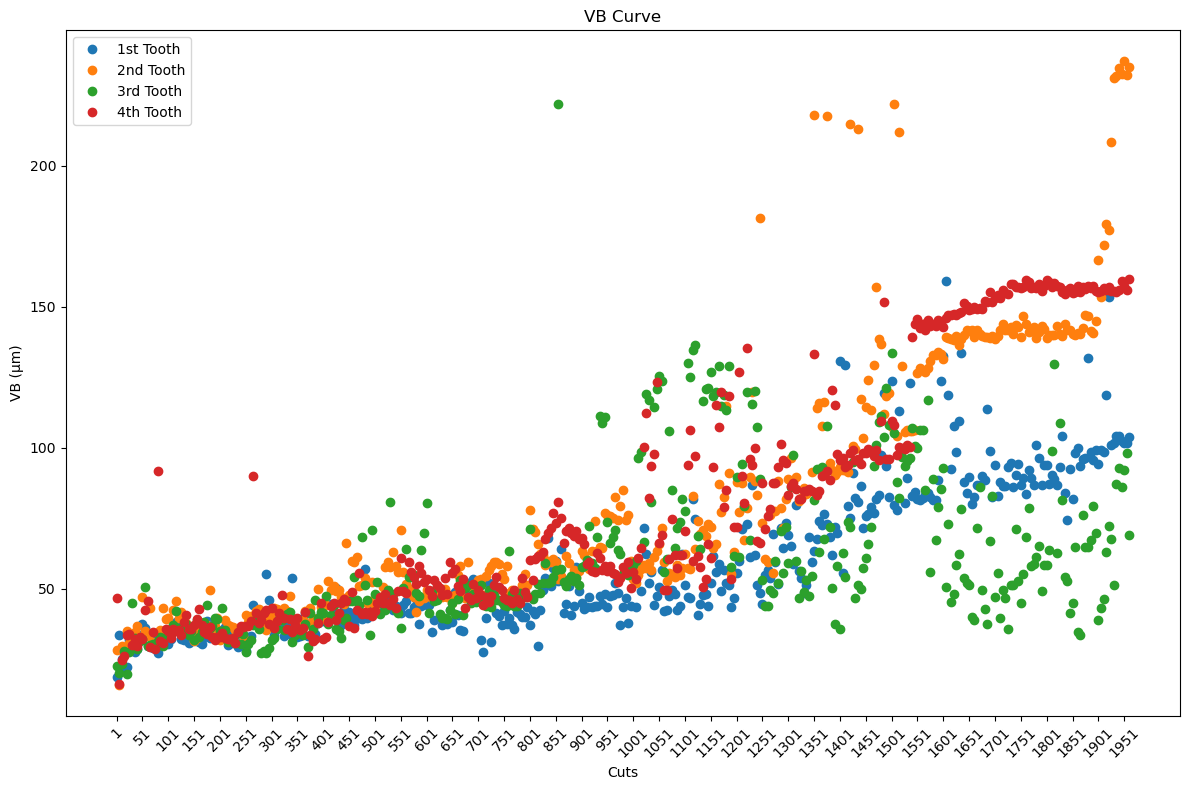

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Define the path to the CSV file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test3_2024.05.28_2024.06.17\Paper\02_Segmented\results\TEST_Pixel_new_Ortagonal.csv"

# Load data from the CSV file
df = pd.read_csv(file_path)

# Creating x-axis labels for all 5 cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Plot the data with markers only
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'])

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts')
plt.ylabel('VB (μm)')
plt.title('VB Curve')
plt.legend()
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()


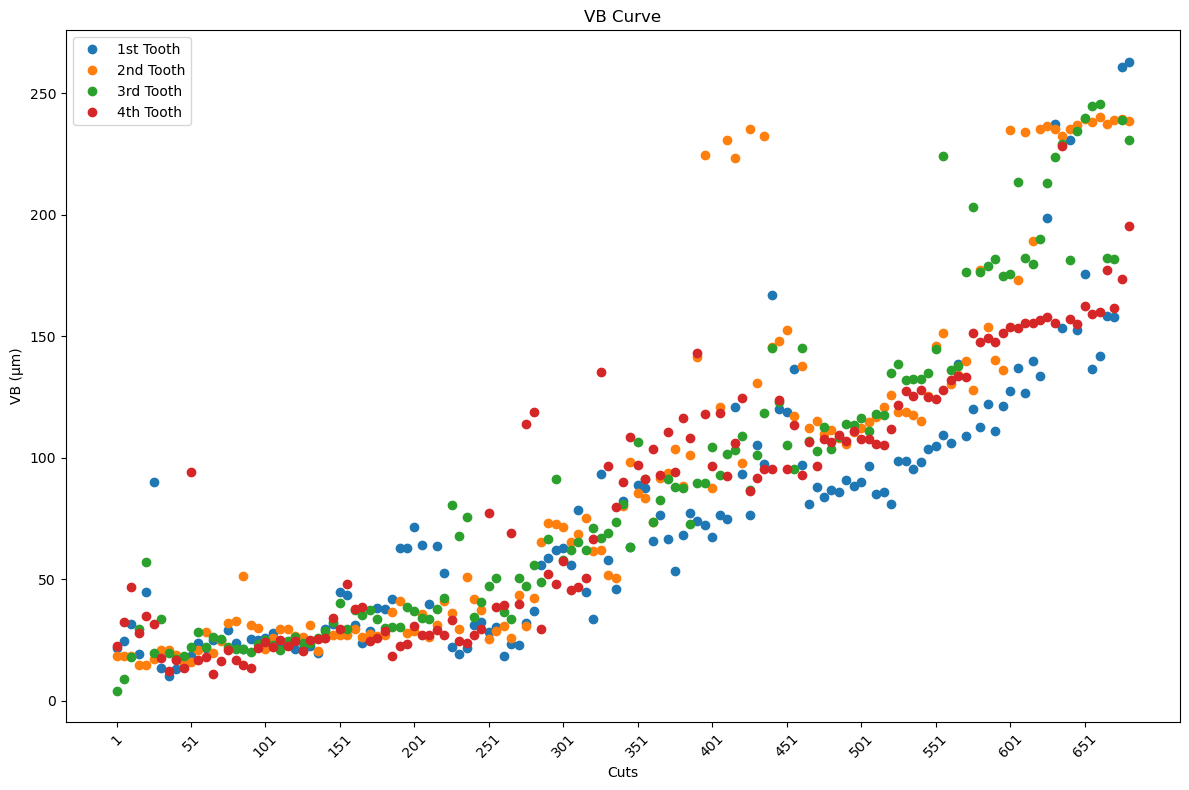

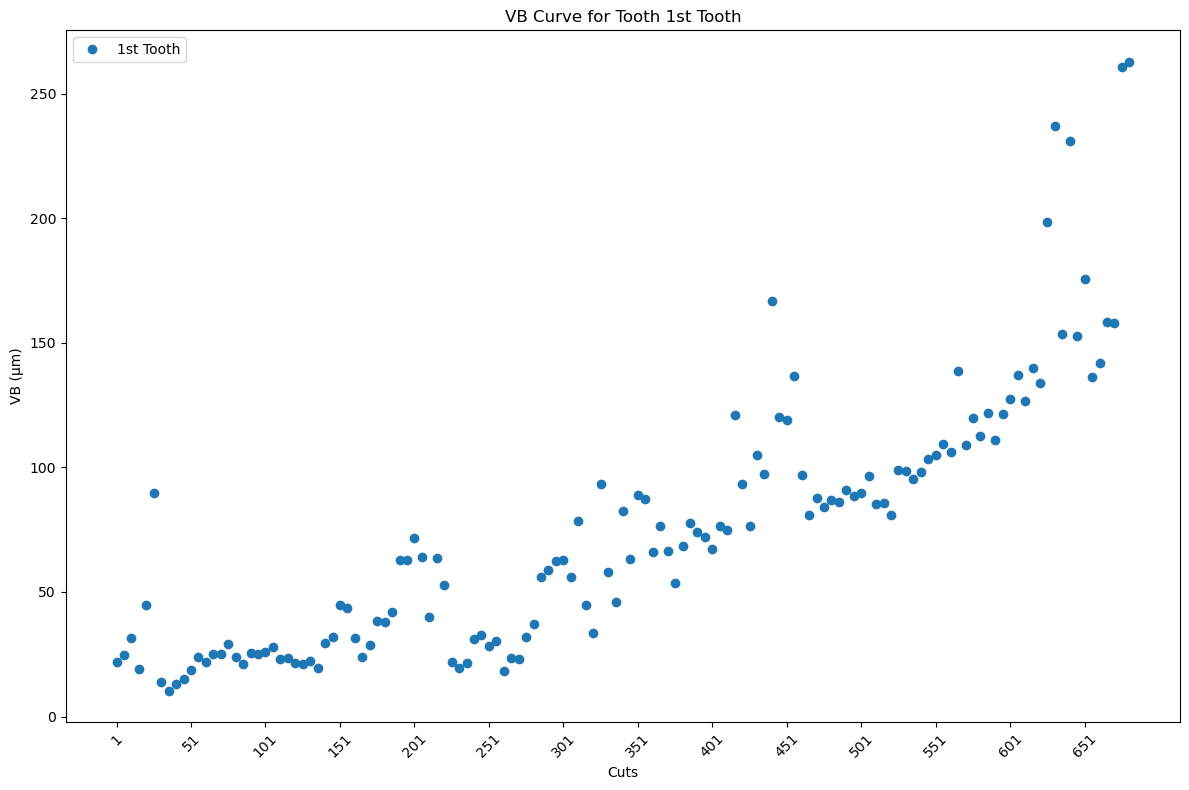

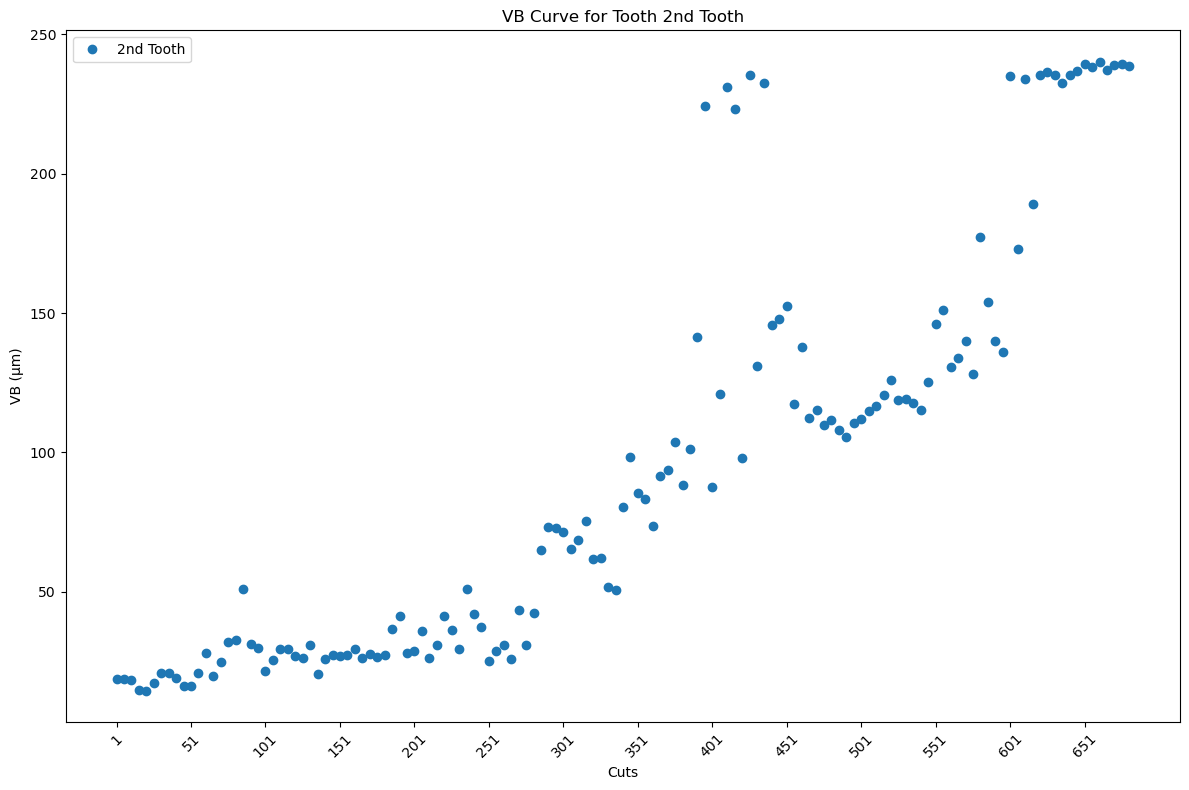

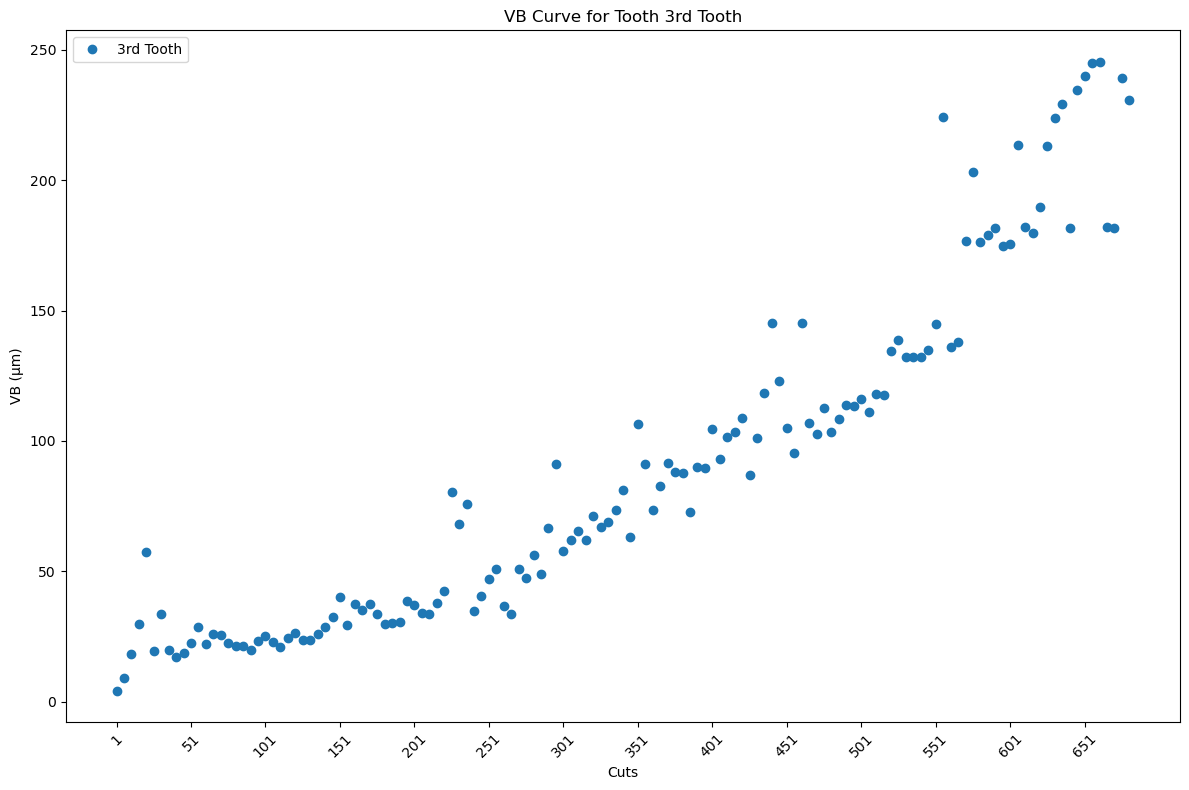

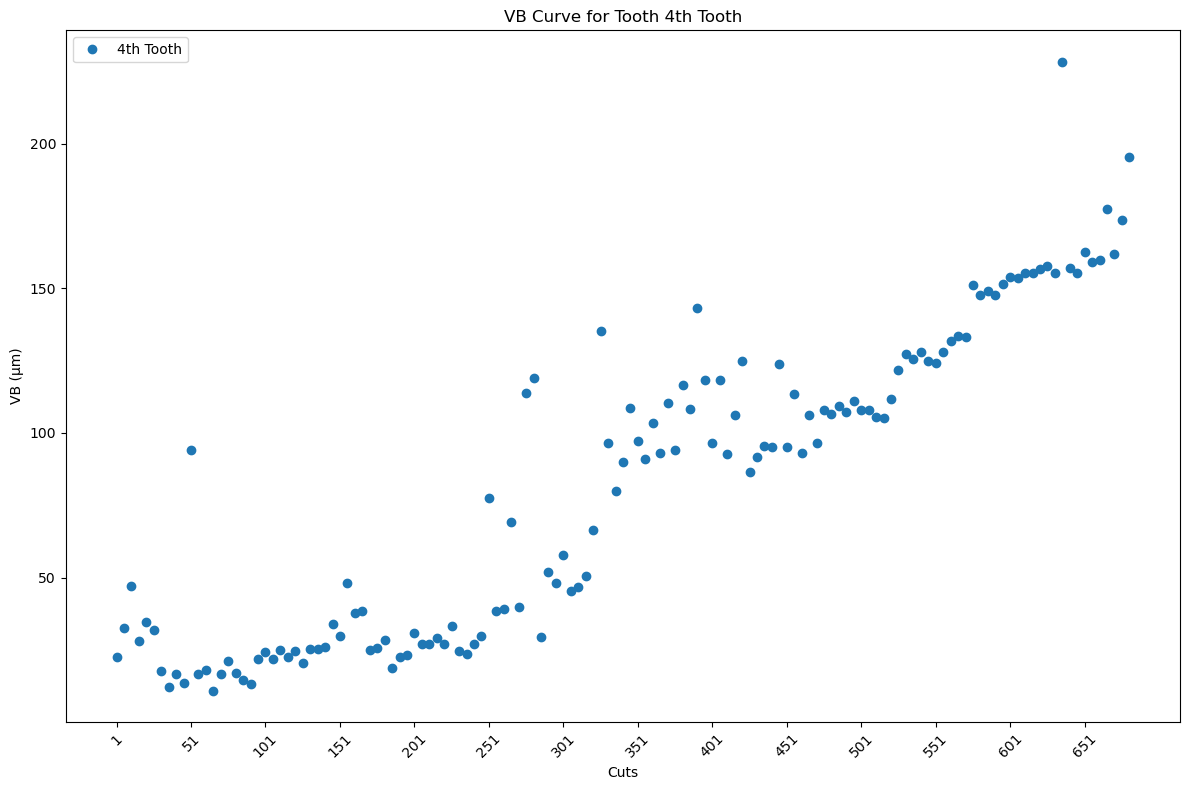

In [27]:
# Load data from Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\TEST_Pixel_new_Ortagonal.xls"
df = pd.read_excel(file_path)

# Creating x-axis labels for all 5 cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results')
os.makedirs(results_folder, exist_ok=True)

# Plot the data with markers only
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'])

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts')
plt.ylabel('VB (μm)')
plt.title('VB Curve')
plt.legend()
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()

# Plot each tooth separately and save
for index, row in df.iterrows():
    plt.figure(figsize=(12, 8))
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'])

    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)
    
    plt.xlabel('Cuts')
    plt.ylabel('VB (μm)')
    plt.title(f'VB Curve for Tooth {row["Tooth"]}')
    plt.legend()
    plt.tight_layout()

    # Full path to save the file
    individual_output_path = os.path.join(results_folder, f'VB_Curve_Tooth_{row["Tooth"]}.png')

    # Save the plot as a PNG file
    plt.savefig(individual_output_path, format='png', dpi=300)
    
    # Show the plot
    plt.show()


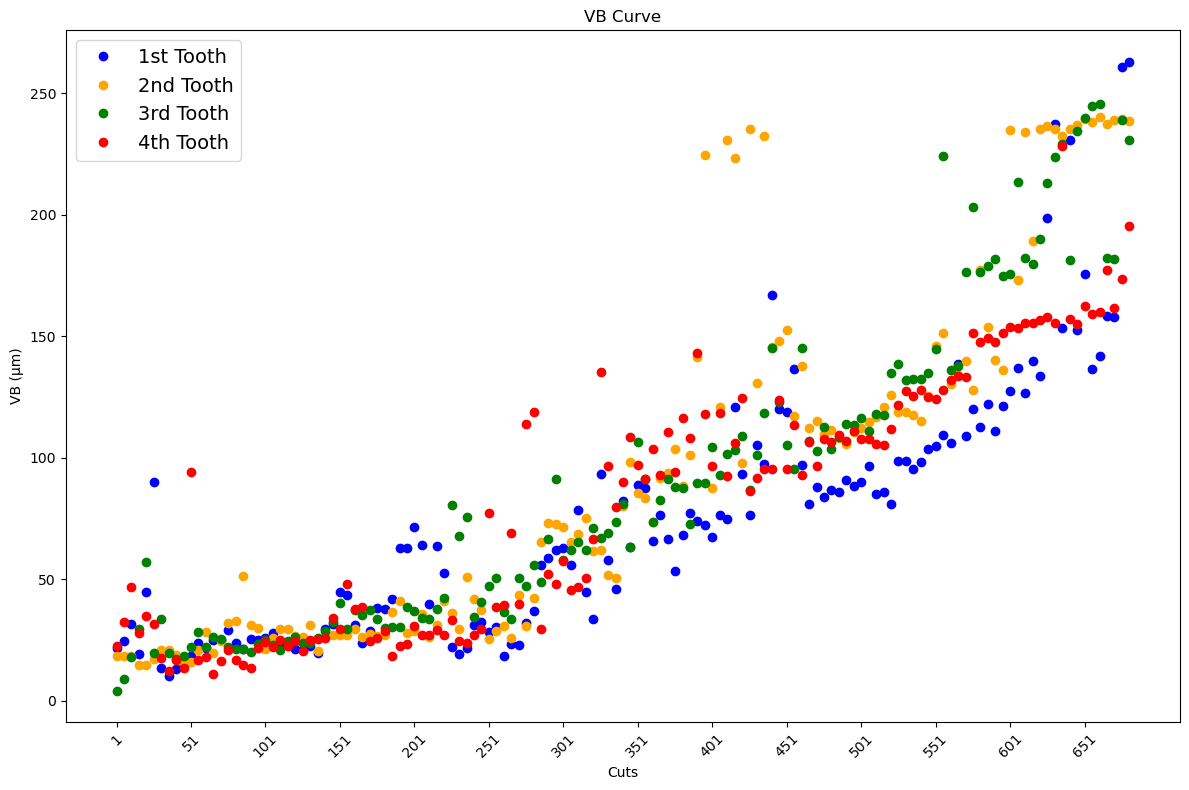

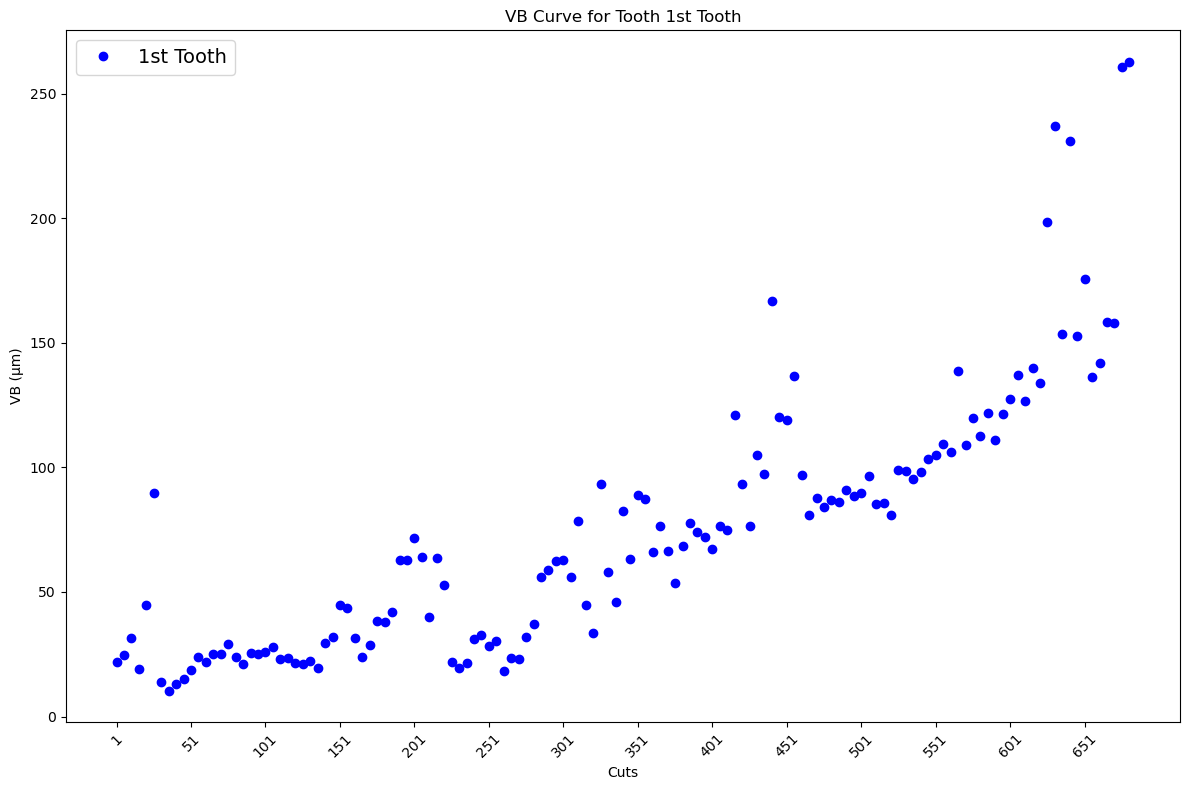

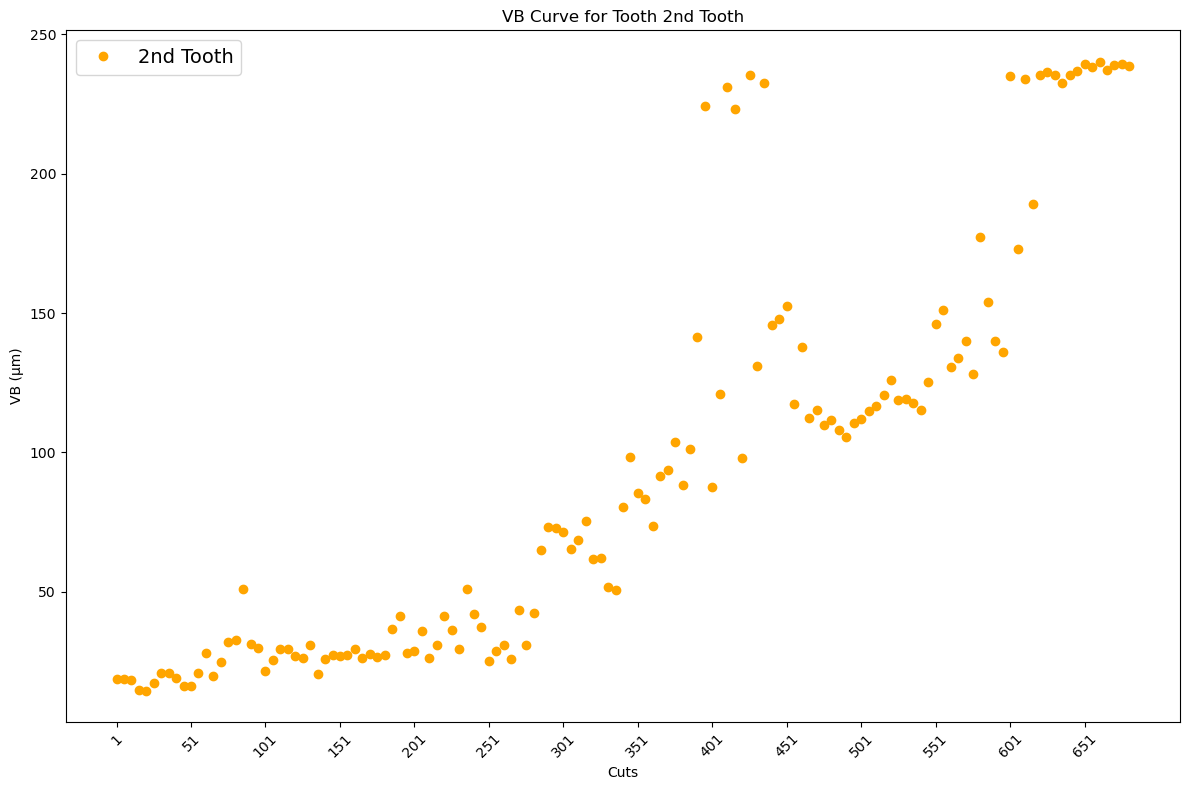

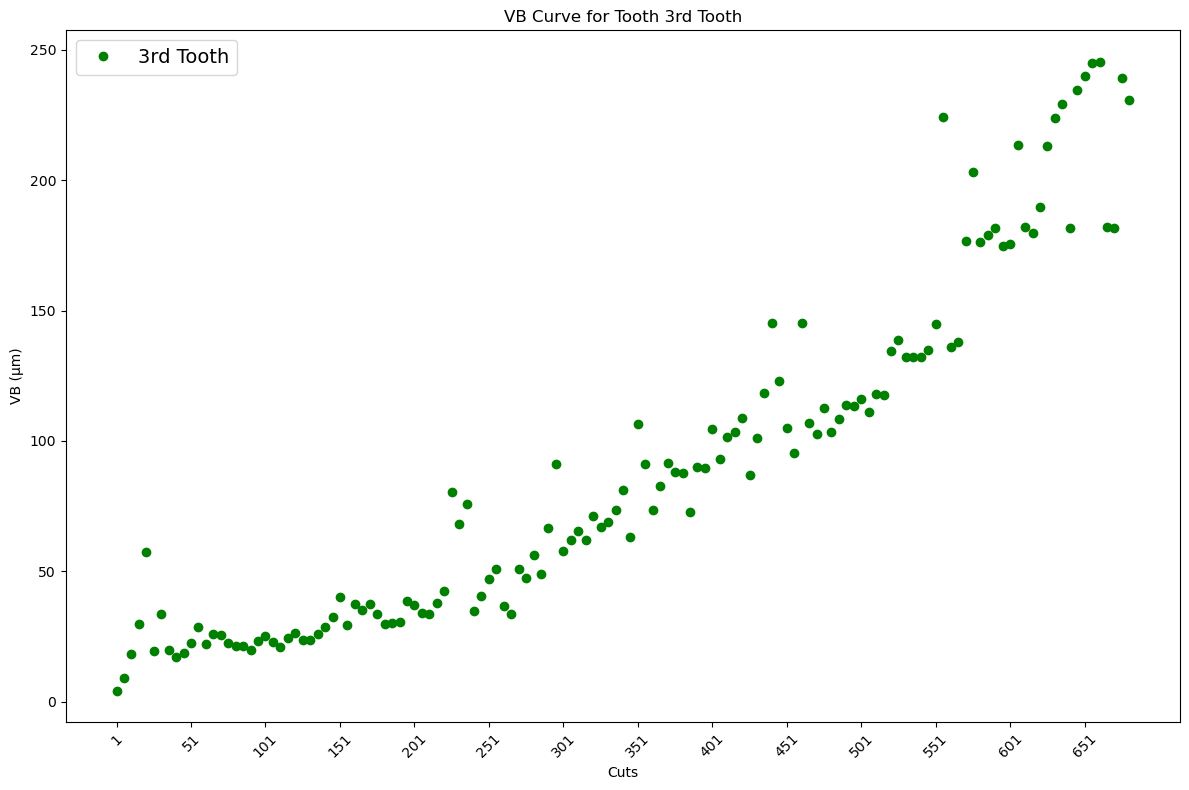

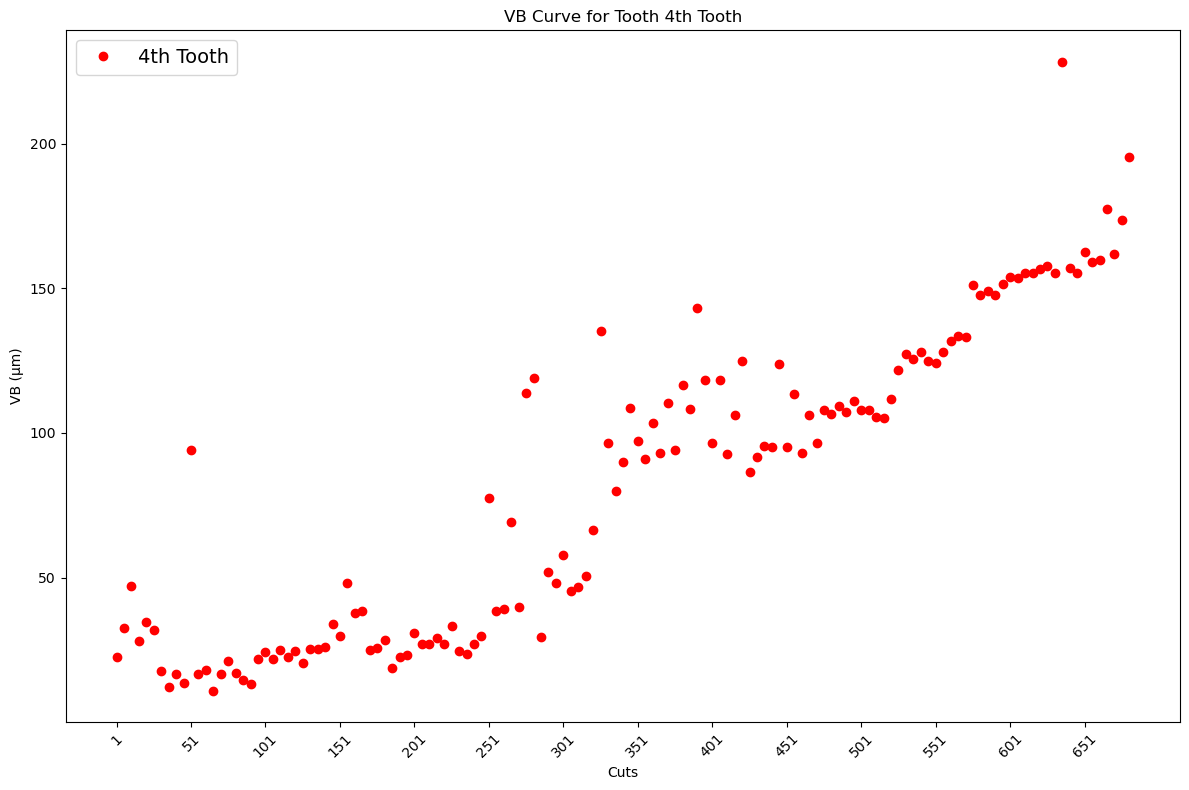

In [34]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\TEST_Pixel_new_Ortagonal.xls"
df = pd.read_excel(file_path)

# Creating x-axis labels for all 5 cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results')
os.makedirs(results_folder, exist_ok=True)

# Define a list of colors
colors = ['blue', 'orange', 'green', 'red']

# Plot the data with markers only
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts')
plt.ylabel('VB (μm)')
plt.title('VB Curve')
plt.legend(fontsize=14)
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()

# Plot each tooth separately and save
for index, row in df.iterrows():
    plt.figure(figsize=(12, 8))
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)
    
    plt.xlabel('Cuts')
    plt.ylabel('VB (μm)')
    plt.title(f'VB Curve for Tooth {row["Tooth"]}')
    plt.legend(fontsize=14)
    plt.tight_layout()

    # Full path to save the file
    individual_output_path = os.path.join(results_folder, f'VB_Curve_Tooth_{row["Tooth"]}.png')

    # Save the plot as a PNG file
    plt.savefig(individual_output_path, format='png', dpi=300)
    
    # Show the plot
    plt.show()


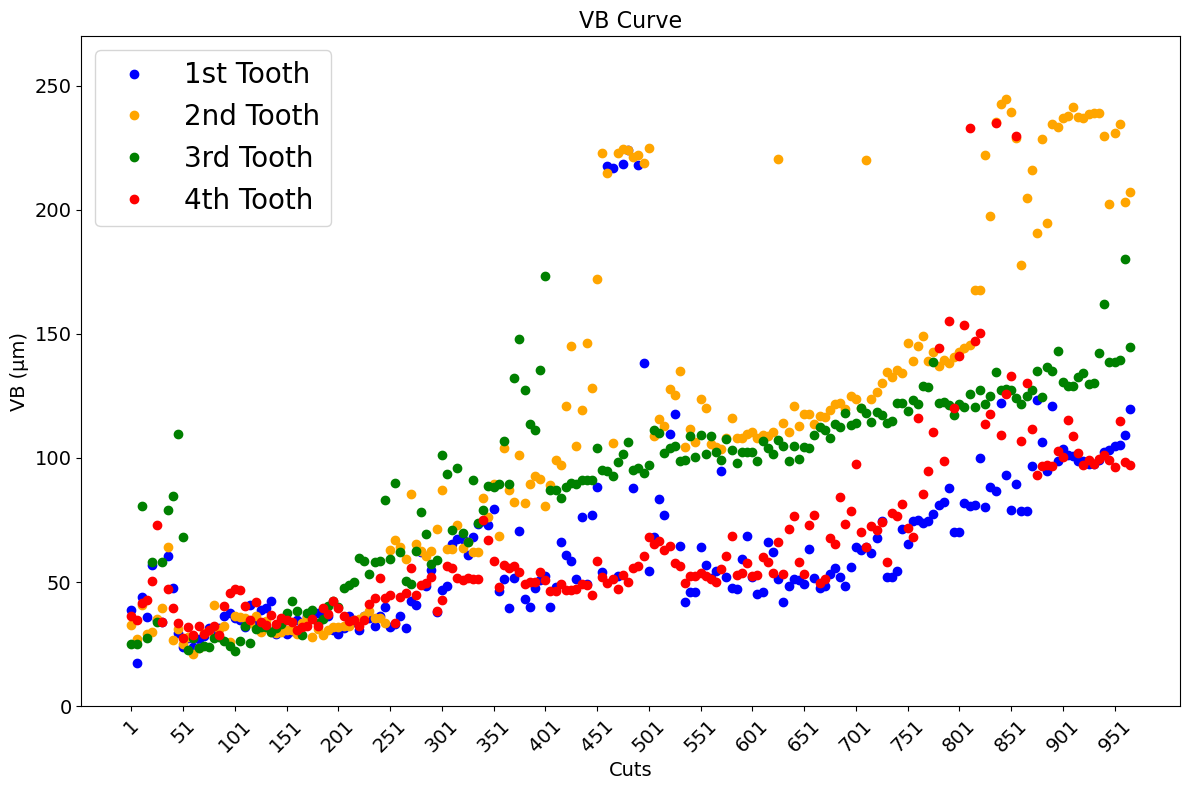

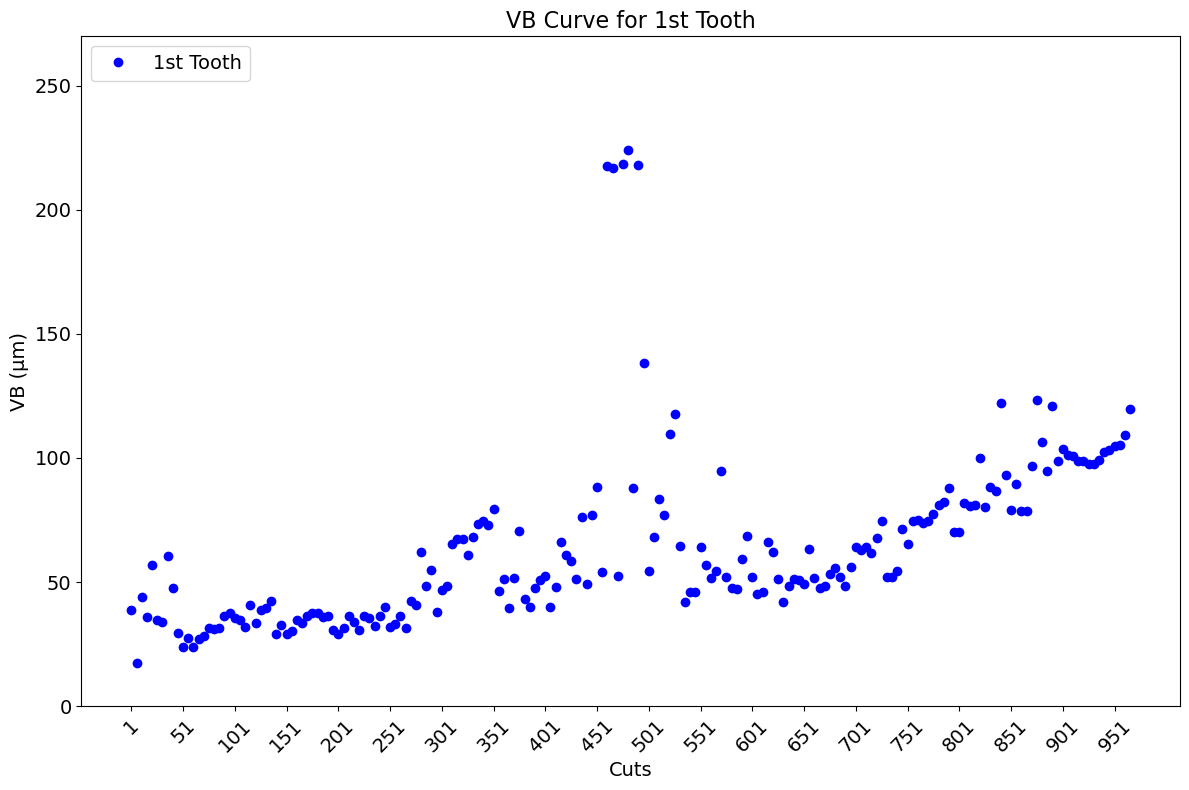

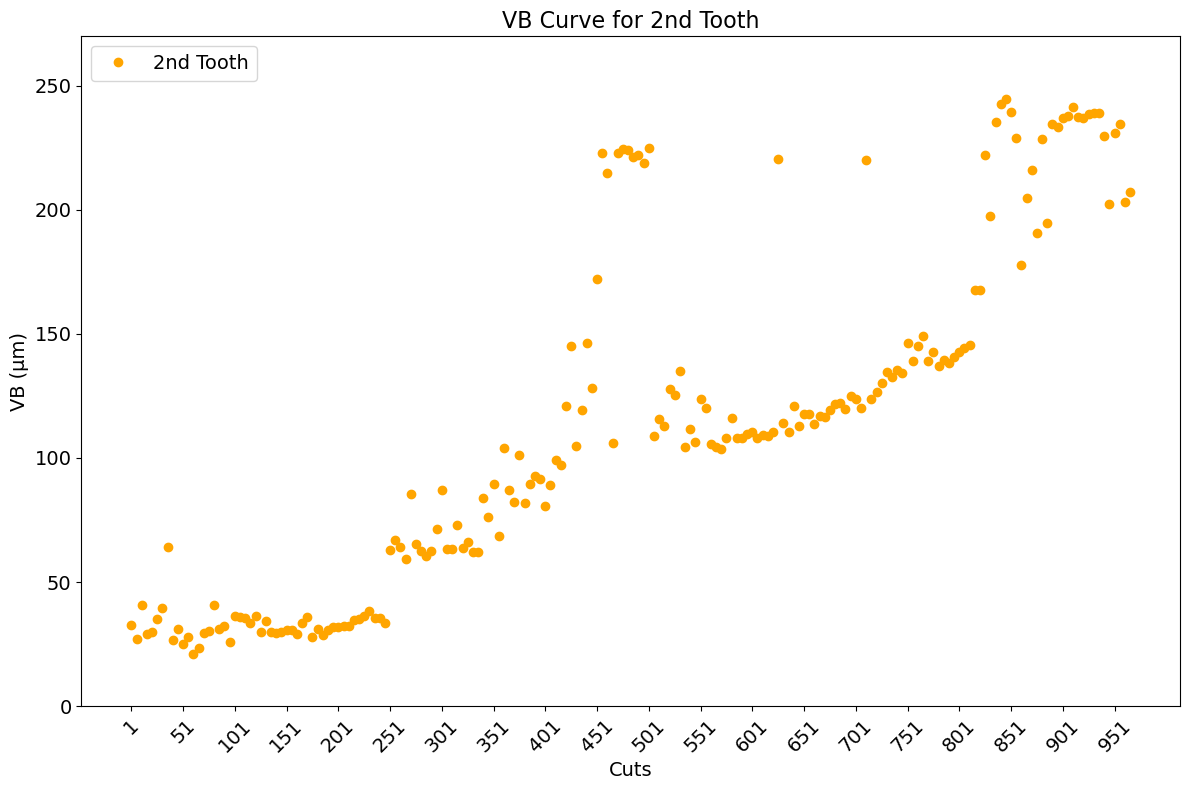

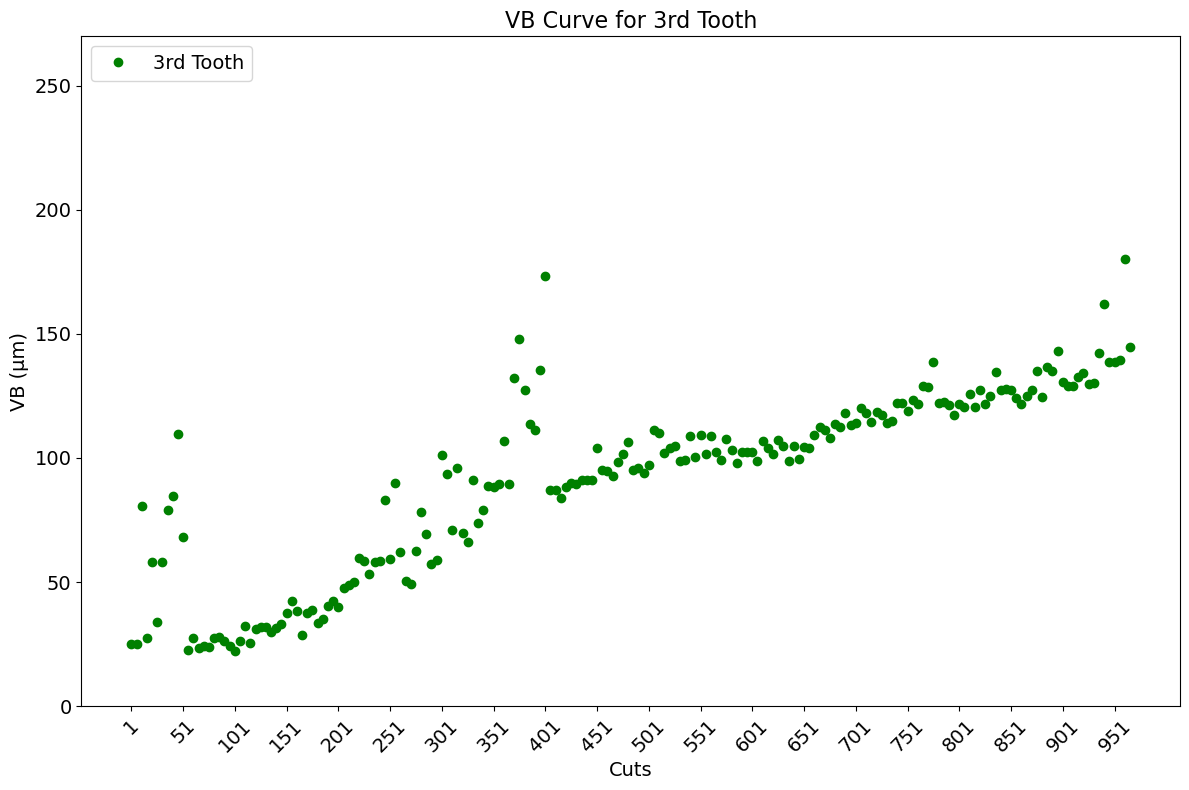

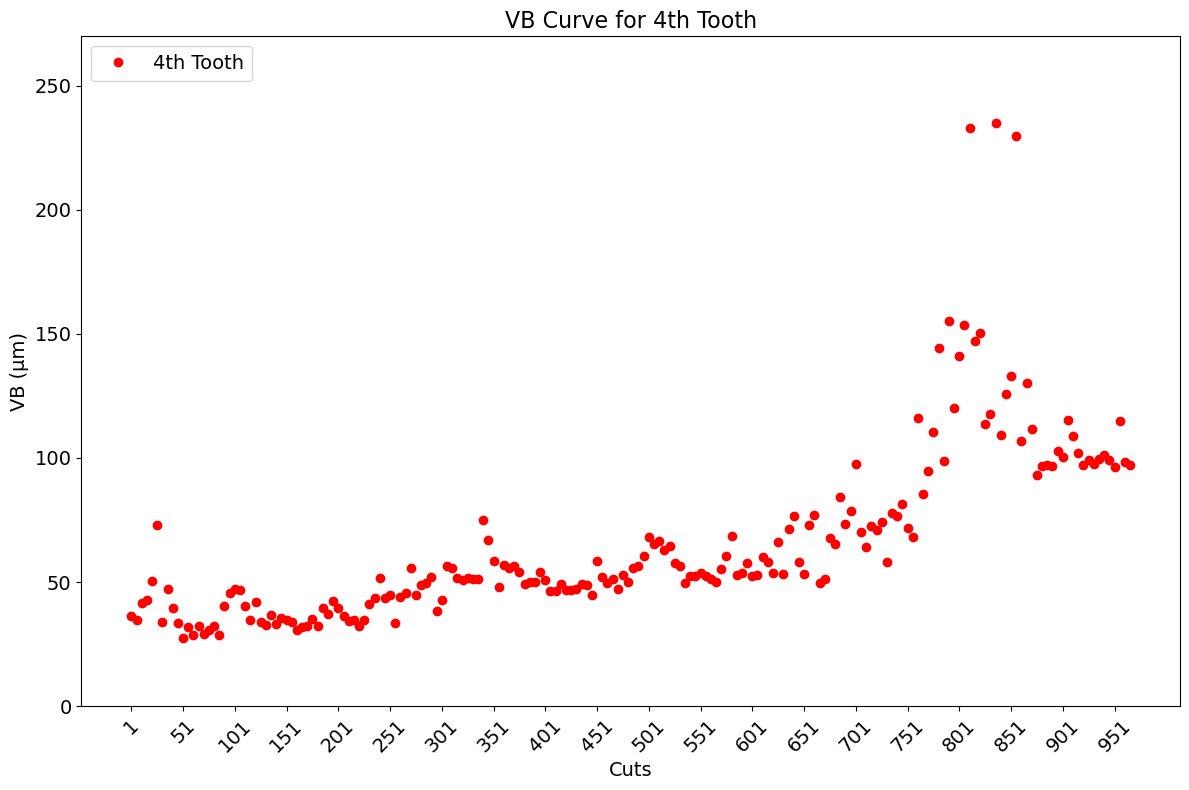

In [59]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test2\Paper\02_Segmented\results\TEST_Pixel_new_Ortagonal.xls"
df = pd.read_excel(file_path)

# Creating x-axis labels for all 5 cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results')
os.makedirs(results_folder, exist_ok=True)

# Define a list of colors
colors = ['blue', 'orange', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Plot the data with markers only
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts', fontsize=14)
plt.ylabel('VB (μm)', fontsize=14)
plt.title('VB Curve', fontsize=16)  # Increase the title font size
plt.legend(loc='upper left',fontsize=20)  # Increase the legend font size
plt.ylim(y_min, y_max)  # Set common y-axis limit
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()

# Plot each tooth separately and save
for index, row in df.iterrows():
    plt.figure(figsize=(12, 8))
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)
    
    plt.xlabel('Cuts', fontsize=14)
    plt.ylabel('VB (μm)', fontsize=14)
    plt.title(f'VB Curve for {row["Tooth"]}', fontsize=16)  # Increase the title font size
    plt.legend(loc='upper left',fontsize=14)  # Increase the legend font size
    plt.ylim(y_min, y_max)  # Set common y-axis limit
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()

    # Full path to save the file
    individual_output_path = os.path.join(results_folder, f'VB_Curve_Tooth_{row["Tooth"]}.png')

    # Save the plot as a PNG file
    plt.savefig(individual_output_path, format='png', dpi=300)
    
    # Show the plot
    plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load data from Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test3_2024.05.28_2024.06.17\Paper\02_Segmented\results\TEST_Pixel_new_Ortagonal.csv"
#df = pd.read_excel(file_path)
# Load data from the CSV file
df = pd.read_csv(file_path)

# Creating x-axis labels for all 5 cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results_Final')
os.makedirs(results_folder, exist_ok=True)

# Define a list of colors
colors = ['blue', 'orange', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Plot the data with markers only
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts', fontsize=14)
plt.ylabel('VB (μm)', fontsize=14)
plt.title('Wear Curve (V$_{f}$=1700 mm/min)', fontsize=16)  # Increase the title font size
plt.legend(loc='upper left',fontsize=20)  # Increase the legend font size
plt.ylim(y_min, y_max)  # Set common y-axis limit
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid(True, linestyle='--')  # Add grid lines
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()

# Plot each tooth separately and save
for index, row in df.iterrows():
    plt.figure(figsize=(12, 8))
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)
    
    plt.xlabel('Cuts', fontsize=14)
    plt.ylabel('VB (μm)', fontsize=14)
    plt.title(f'Wear Curve ({row["Tooth"]})', fontsize=16)  # Increase the title font size
    plt.legend(loc='upper left',fontsize=14)  # Increase the legend font size
    plt.ylim(y_min, y_max)  # Set common y-axis limit
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(True, linestyle='--')  # Add grid lines
    plt.tight_layout()

    # Full path to save the file
    individual_output_path = os.path.join(results_folder, f'VB_Curve_Tooth_{row["Tooth"]}.png')

    # Save the plot as a PNG file
    plt.savefig(individual_output_path, format='png', dpi=300)
    
    # Show the plot
    plt.show()


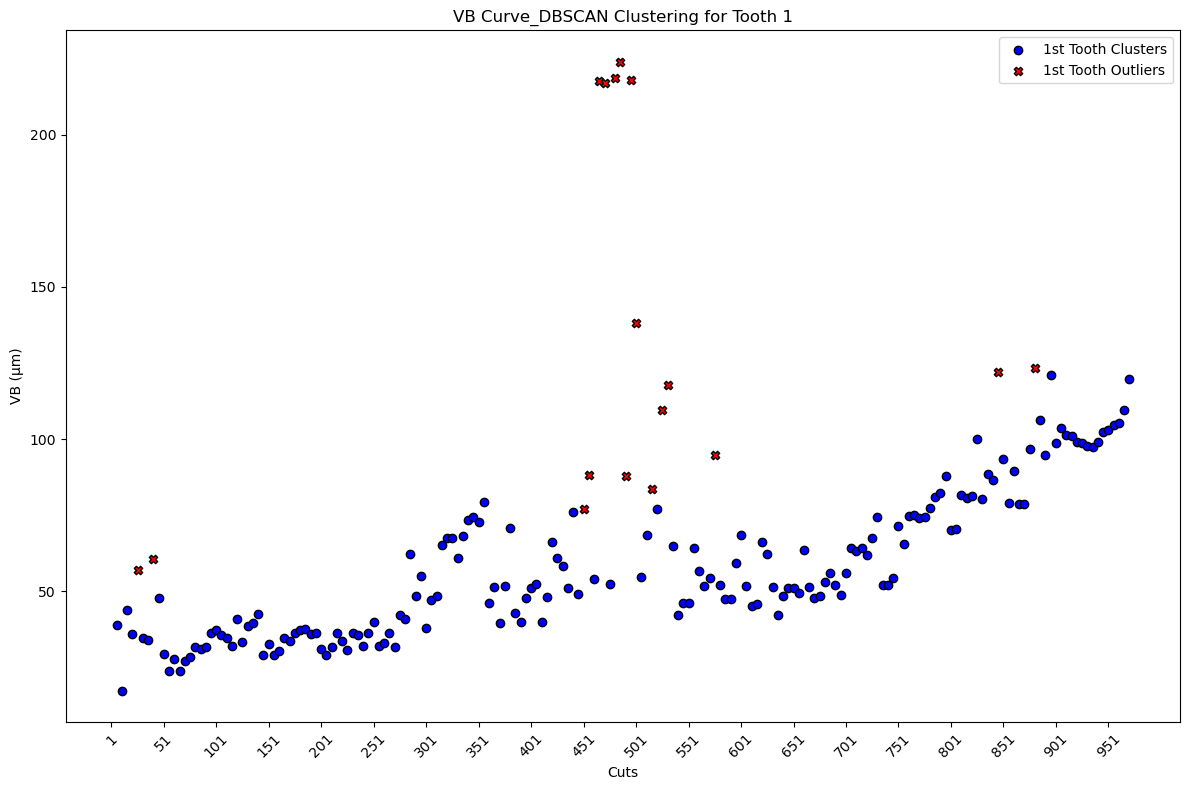

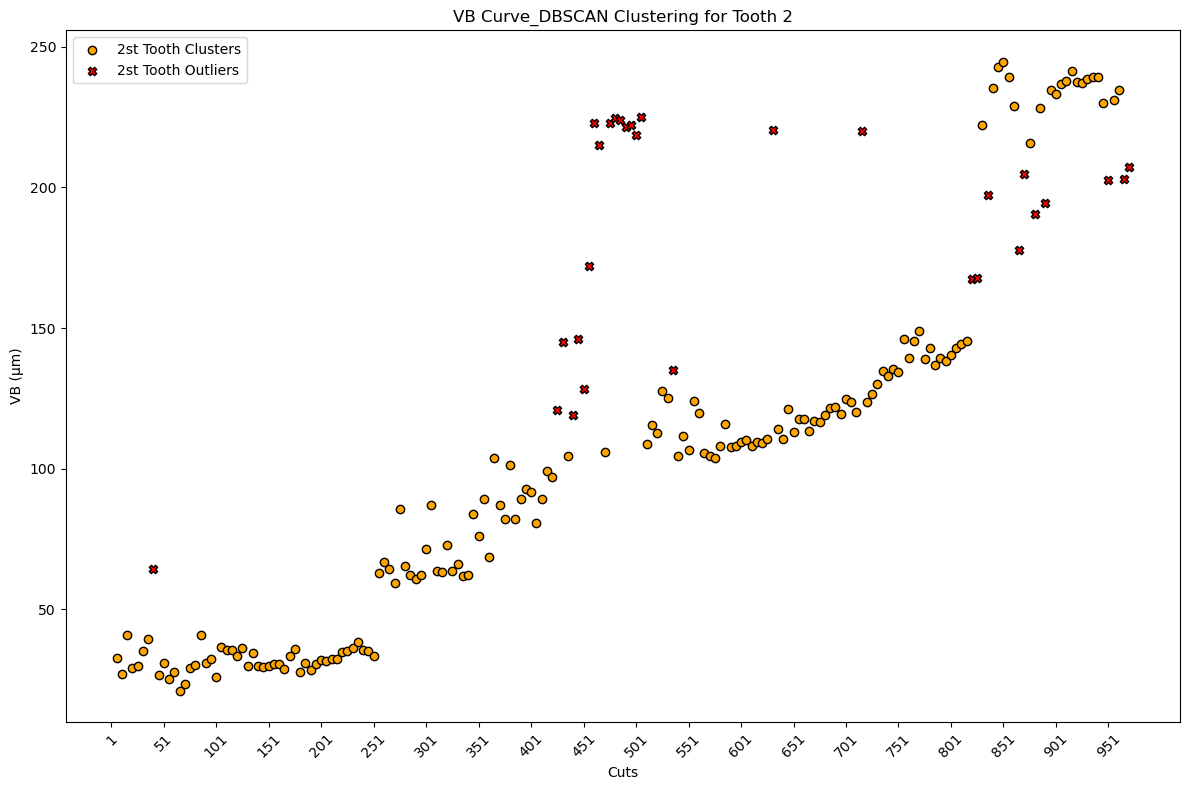

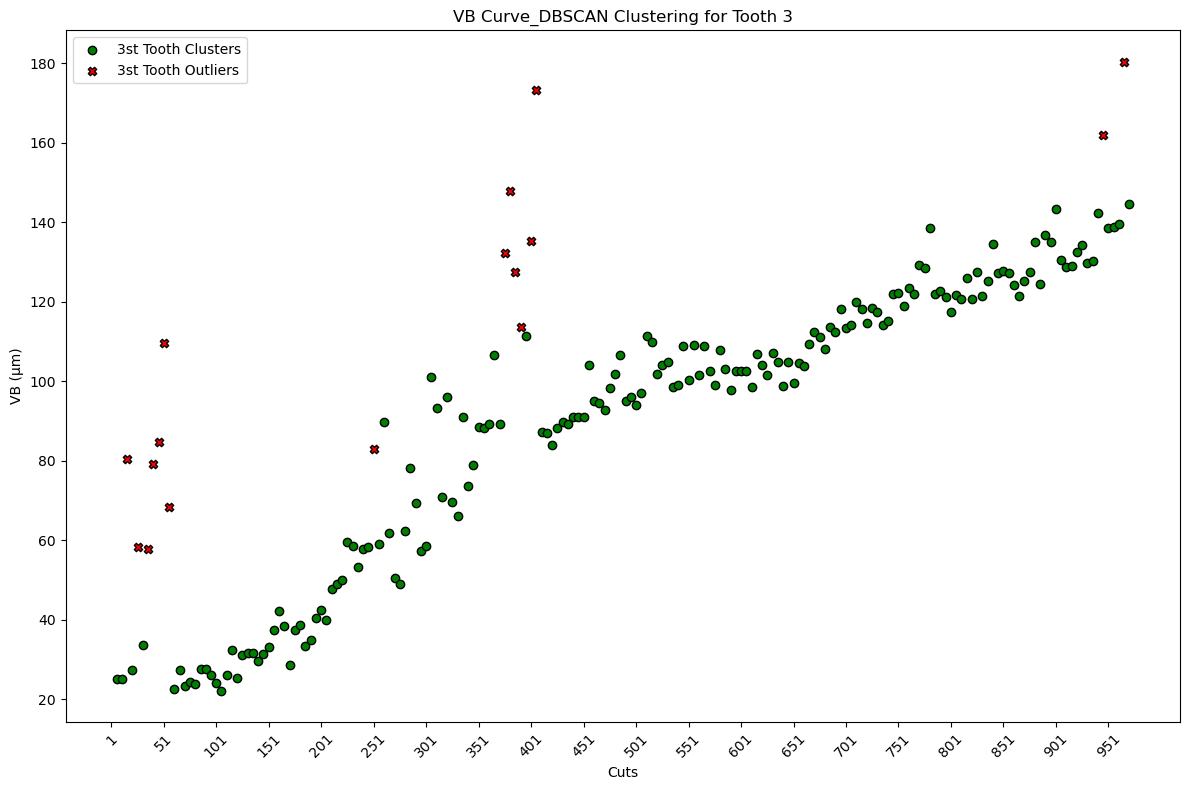

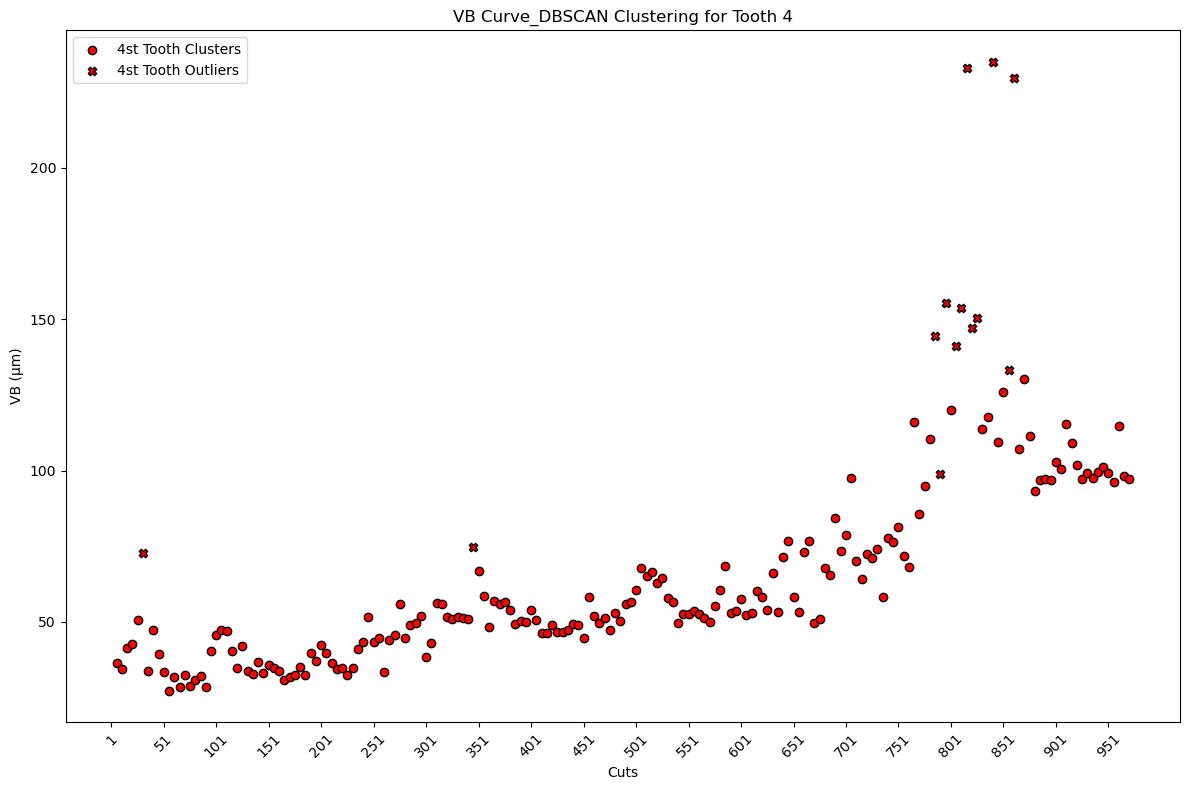

In [63]:
# Load data from Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test2\Paper\02_Segmented\results\TEST_Pixel_new_Ortagonal.xls"
df = pd.read_excel(file_path)

# Create color map for the teeth
colors = ['blue', 'orange', 'green', 'red']

# Function to apply DBSCAN clustering and plot the results
def apply_dbscan_and_plot(df, tooth_index, color, output_path):
    # Extract the wear values for DBSCAN clustering
    wear_values = df.iloc[tooth_index, 1:].to_numpy()

    # Generate x-values starting from 1 to the length of wear values
    x_values = np.arange(1, len(wear_values) + 1)

    # Create the 2D data array
    data_2d = np.column_stack((x_values, wear_values))

    # Fit the DBSCAN model
    clustering = DBSCAN(eps=15, min_samples=10).fit(data_2d)

    # Extract the labels
    labels = clustering.labels_

    # Create a scatter plot for the clusters
    plt.figure(figsize=(12, 8))

    # Plot clusters in blue
    class_member_mask = (labels != -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, edgecolor='k', label=f'{tooth_index + 1}st Tooth Clusters')

    # Plot outliers in red
    class_member_mask = (labels == -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c='red',  marker='X', edgecolor='k', label=f'{tooth_index + 1}st Tooth Outliers')

    # Generate x-axis labels for all cuts
    x_labels = [f'{i}' for i in range(1, (df.shape[1] - 1) * 5, 5)]

    # Reduce the number of x-axis labels by selecting a subset
    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

    plt.title(f'VB Curve_DBSCAN Clustering for Tooth {tooth_index + 1}')
    plt.xlabel('Cuts')
    plt.ylabel('VB (μm)')
    plt.legend()
    plt.tight_layout()
    

    # Save the plot as a PNG file
    plt.savefig(os.path.join(output_path, f'VB_Curve_DBSCAN_Tooth_{tooth_index + 1}.png'), format='png', dpi=300)

    plt.show()

# Directory to save the results
results_folder = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test2\Paper\02_Segmented\results\results"
os.makedirs(results_folder, exist_ok=True)

# Apply DBSCAN and plot for each tooth
for tooth_index in range(4):
    apply_dbscan_and_plot(df, tooth_index, colors[tooth_index], results_folder)


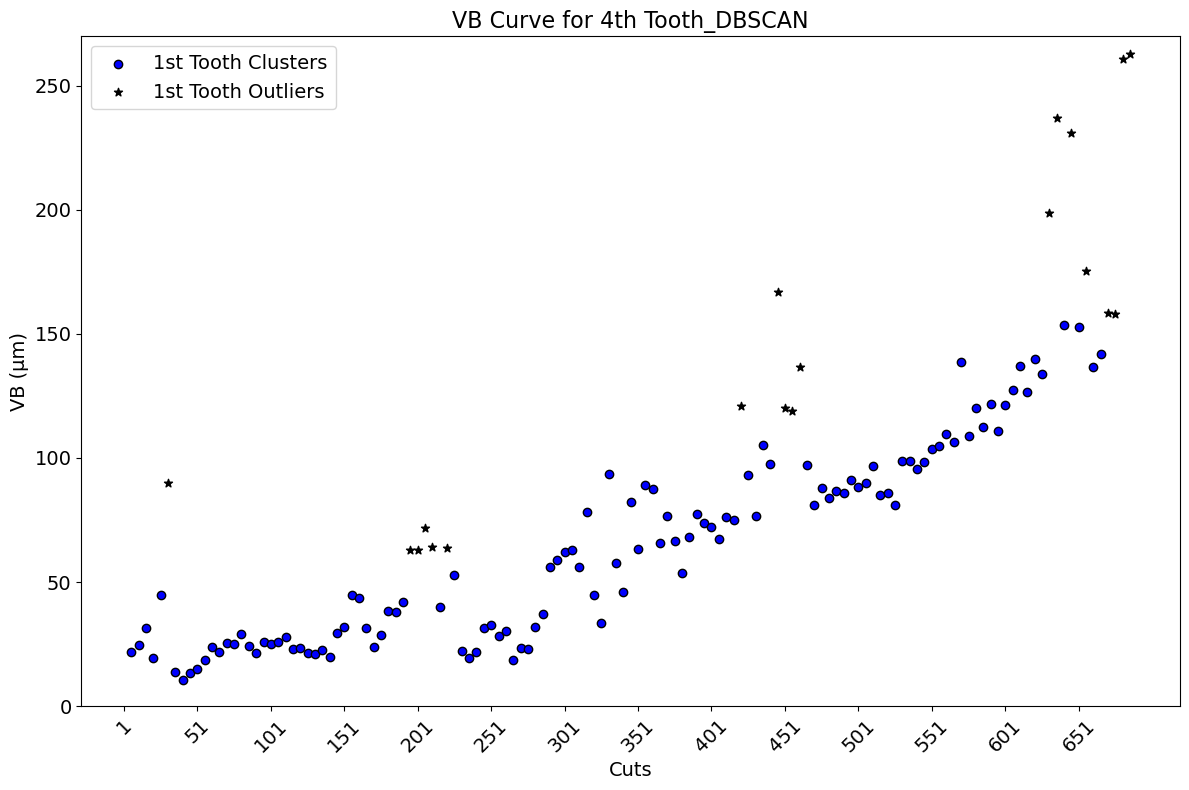

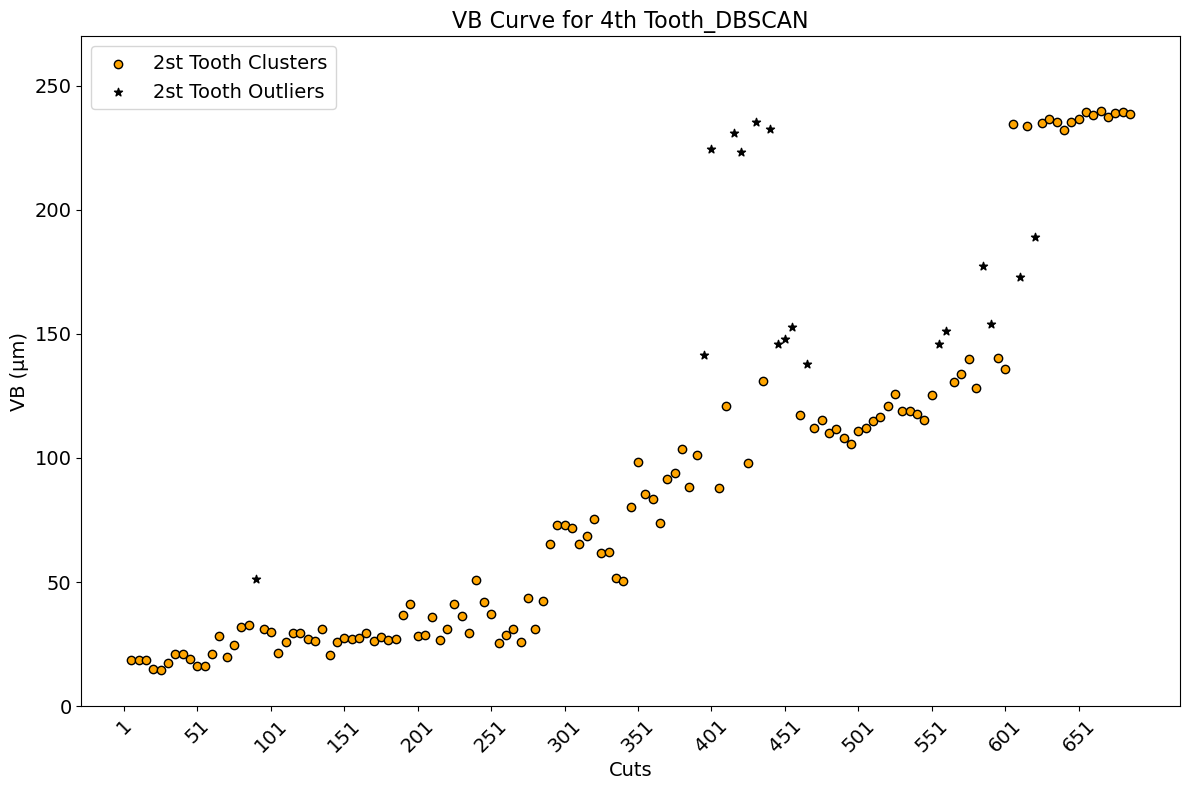

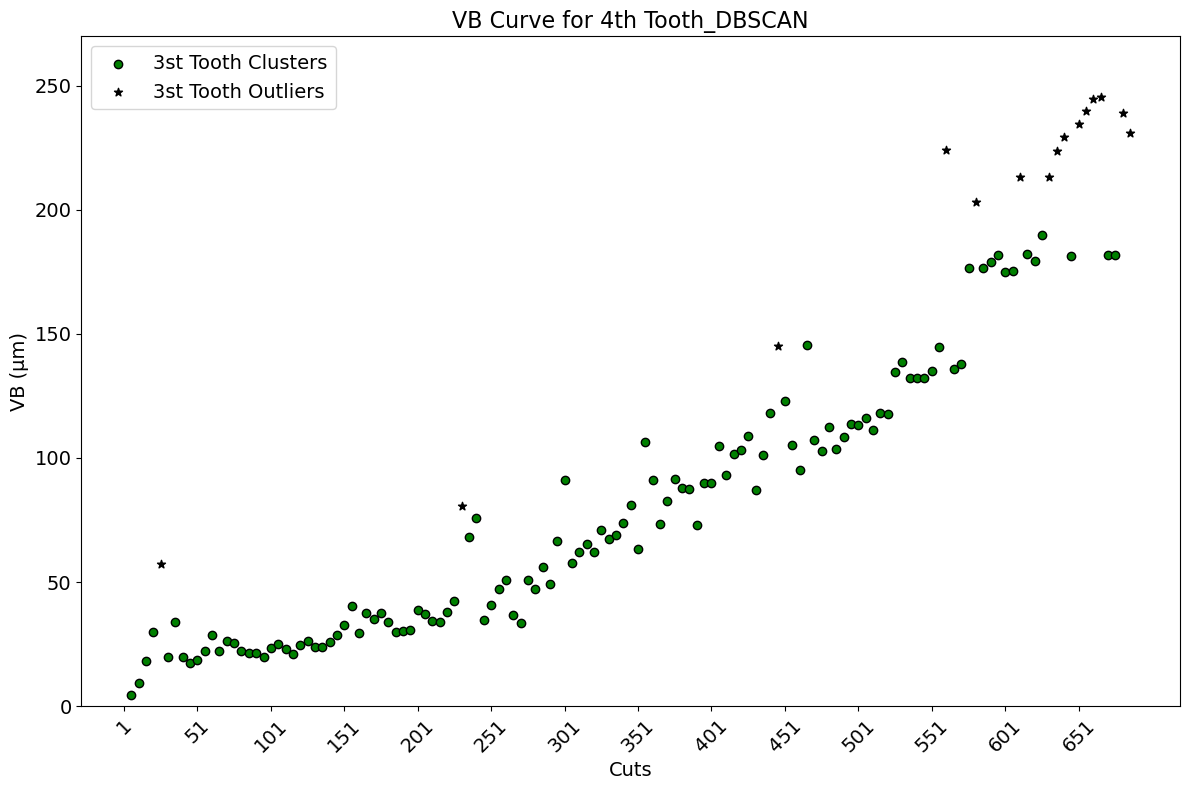

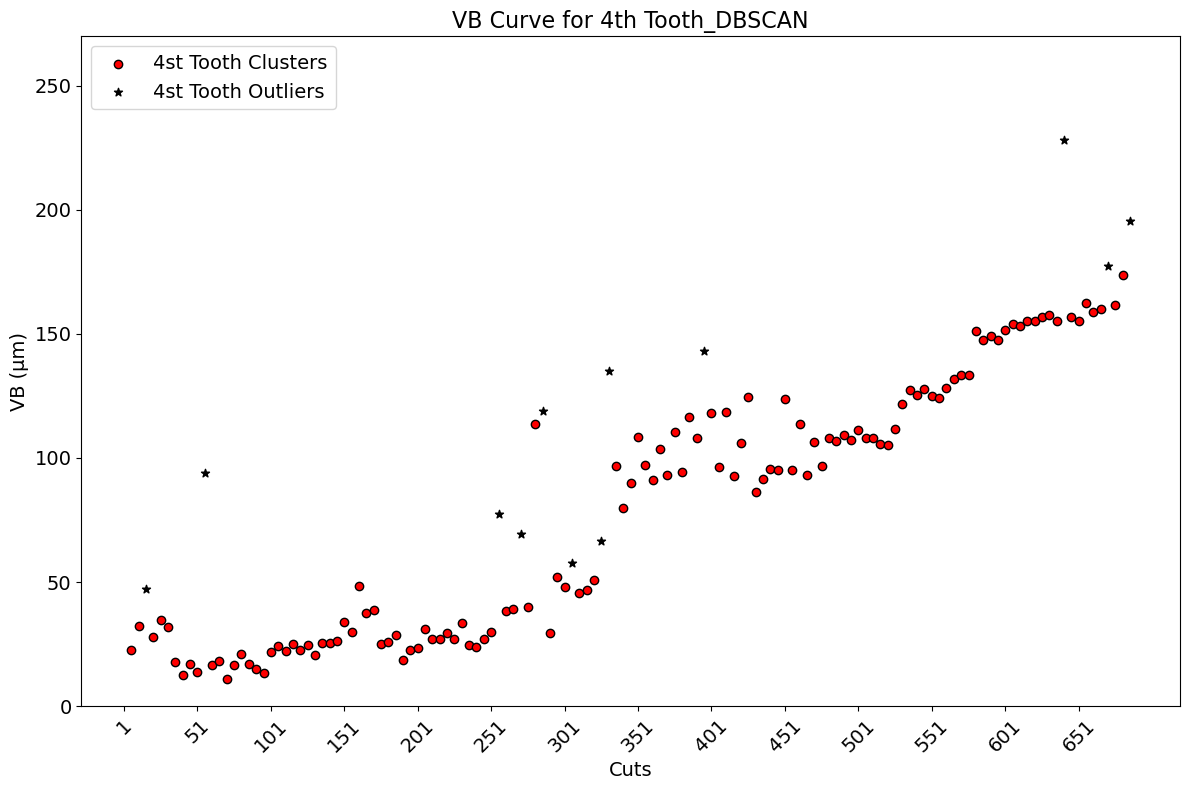

In [50]:
# Load data from Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\TEST_Pixel_new_Ortagonal.xls"
df = pd.read_excel(file_path)

# Create color map for the teeth
colors = ['blue', 'orange', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Function to apply DBSCAN clustering and plot the results
def apply_dbscan_and_plot(df, tooth_index, color, output_path):
    # Extract the wear values for DBSCAN clustering
    wear_values = df.iloc[tooth_index, 1:].to_numpy()

    # Generate x-values starting from 1 to the length of wear values
    x_values = np.arange(1, len(wear_values) + 1)

    # Create the 2D data array
    data_2d = np.column_stack((x_values, wear_values))

    # Fit the DBSCAN model
    clustering = DBSCAN(eps=15, min_samples=10).fit(data_2d)

    # Extract the labels
    labels = clustering.labels_

    # Create a scatter plot for the clusters
    plt.figure(figsize=(12, 8))

    # Plot clusters in blue
    class_member_mask = (labels != -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, marker='o', edgecolor='k', label=f'{tooth_index + 1}st Tooth Clusters')

    # Plot outliers in red
    class_member_mask = (labels == -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c='black',  marker='*', edgecolor='k', label=f'{tooth_index + 1}st Tooth Outliers')

    # Generate x-axis labels for all cuts
    x_labels = [f'{i}' for i in range(1, (df.shape[1] - 1) * 5, 5)]

    # Reduce the number of x-axis labels by selecting a subset
    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

    #plt.title(f'VB Curve_DBSCAN Clustering for Tooth {tooth_index + 1}', fontsize=16)
    plt.title(f'VB Curve for {row["Tooth"]}_DBSCAN', fontsize=16)  # Increase the title font size
    plt.xlabel('Cuts', fontsize=14)
    plt.ylabel('VB (μm)', fontsize=14)
    plt.legend(loc='upper left',fontsize=14)
    plt.ylim(y_min, y_max)  # Set common y-axis limit
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()
    

    # Save the plot as a PNG file
    plt.savefig(os.path.join(output_path, f'VB_Curve_DBSCAN_Tooth_{tooth_index + 1}.png'), format='png', dpi=300)

    plt.show()

# Directory to save the results
results_folder = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\results2"
os.makedirs(results_folder, exist_ok=True)

# Apply DBSCAN and plot for each tooth
for tooth_index in range(4):
    apply_dbscan_and_plot(df, tooth_index, colors[tooth_index], results_folder)


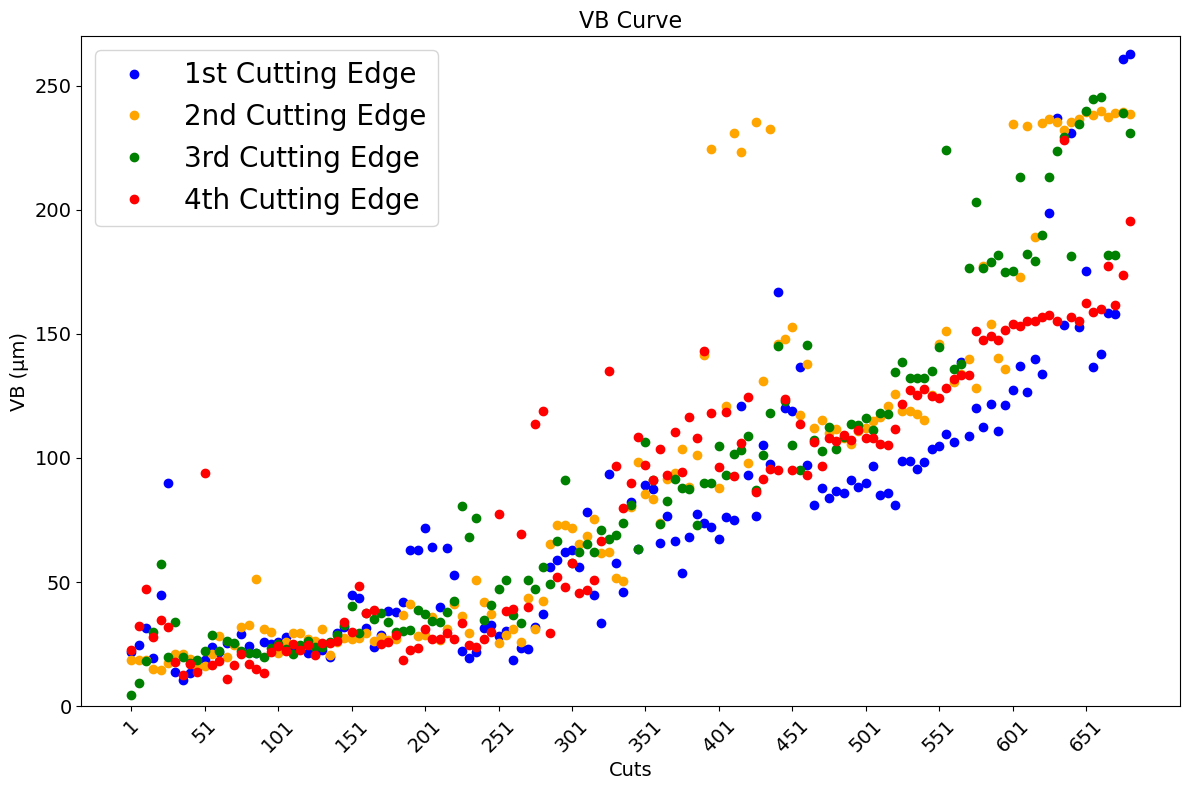

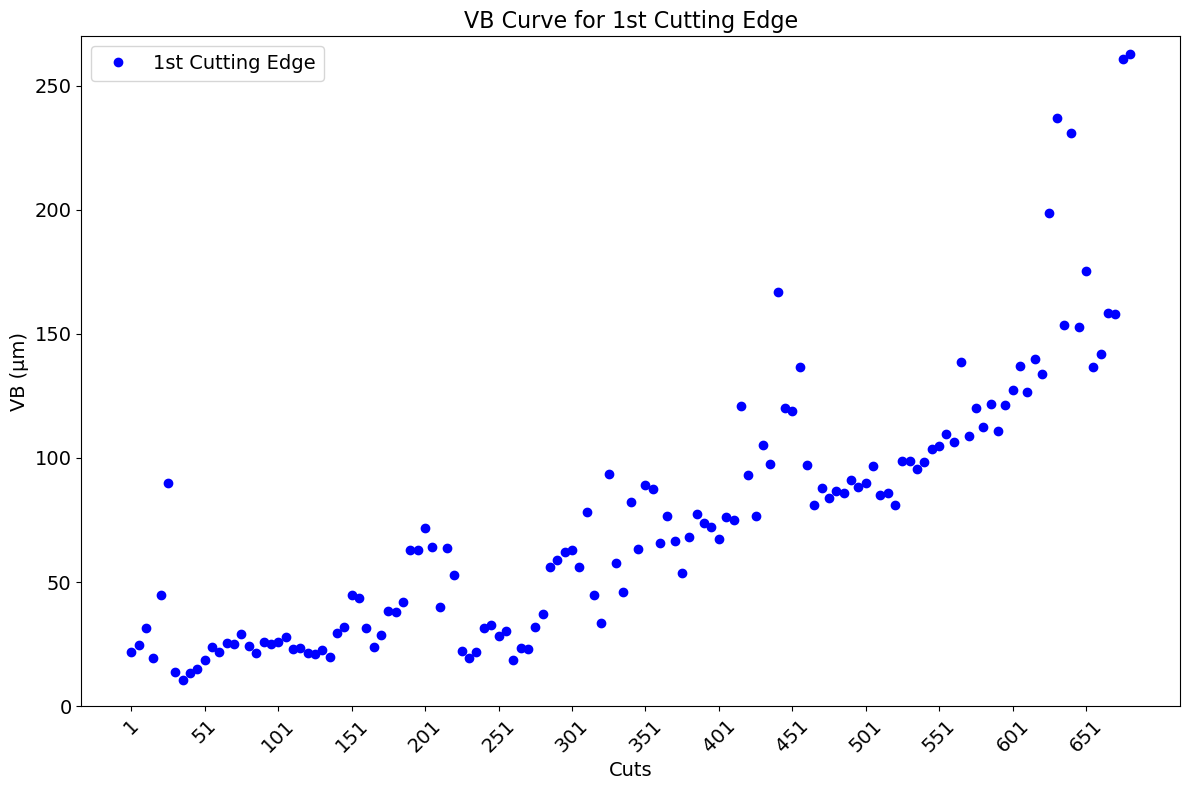

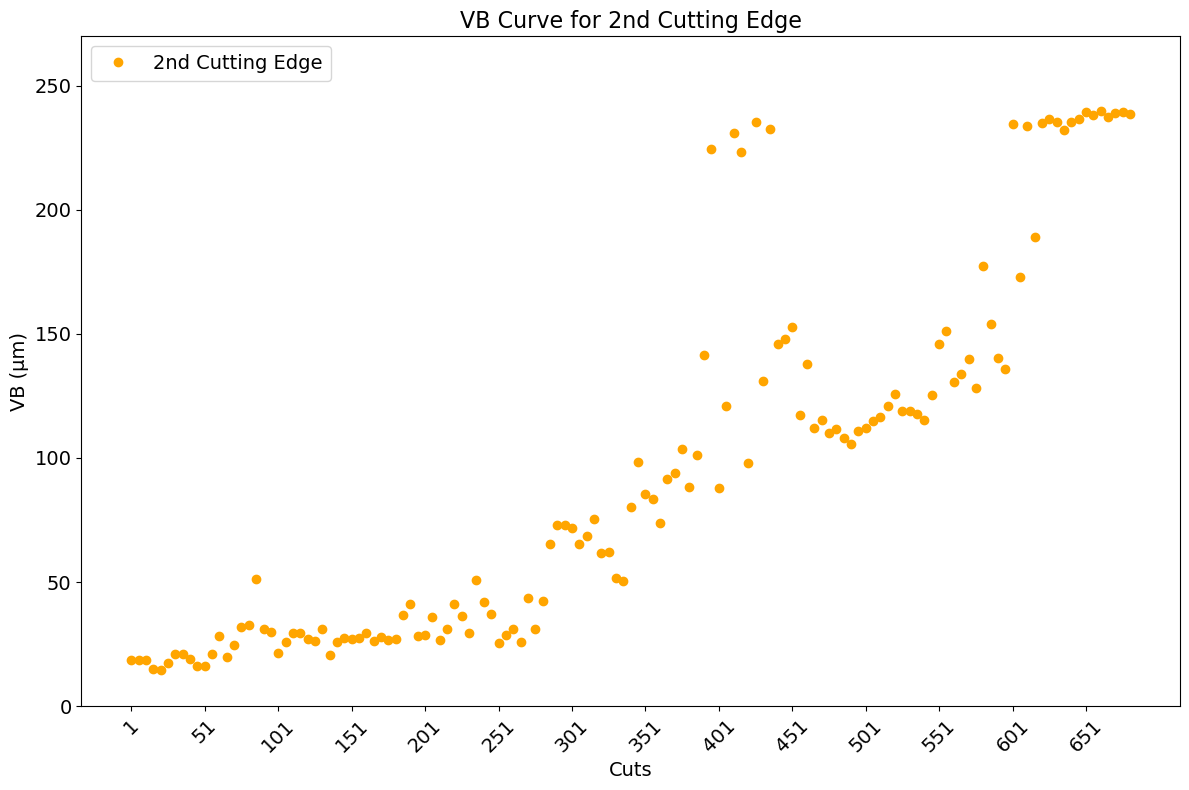

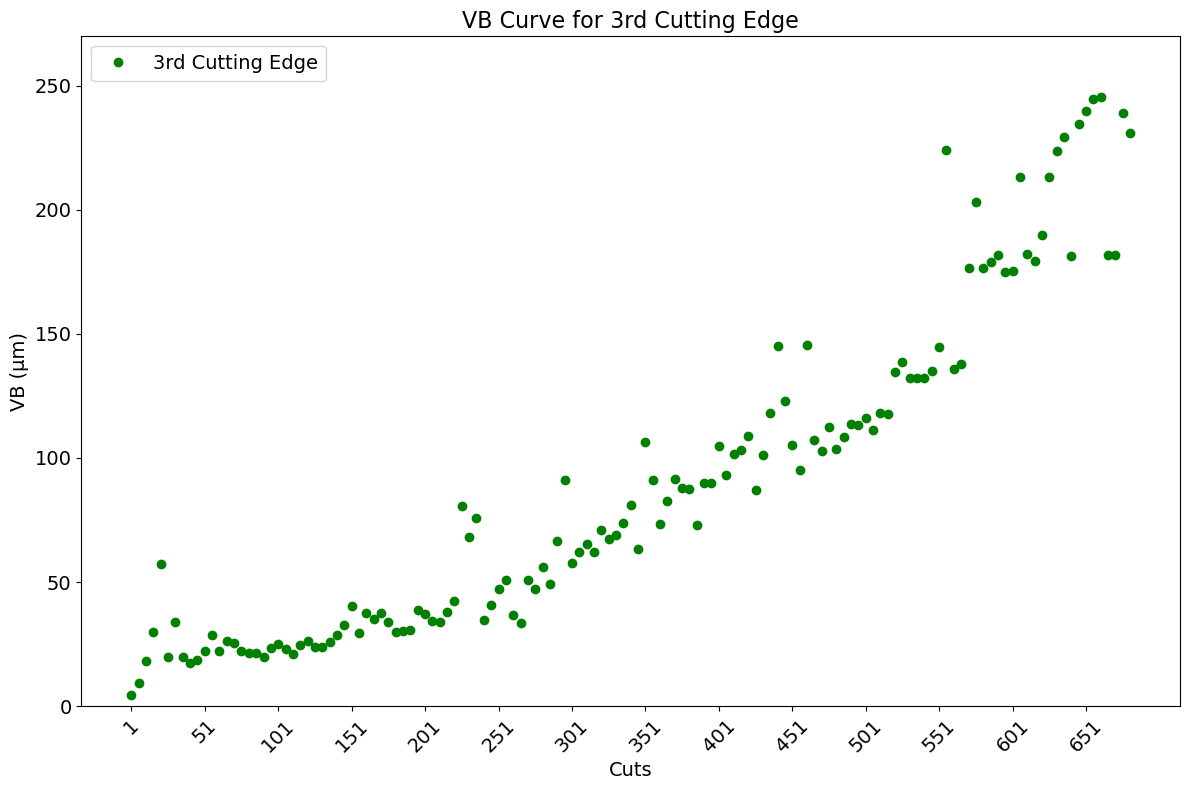

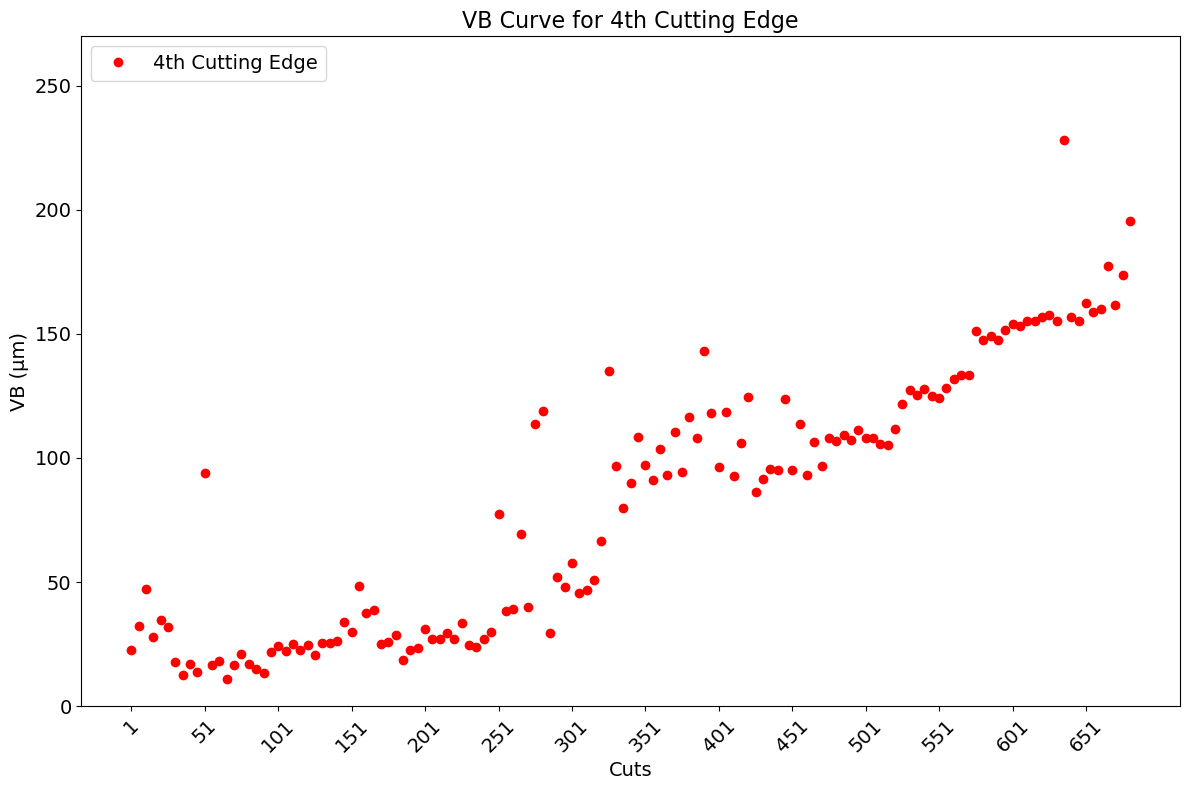

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the path to the CSV file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\TEST_Pixel_new_Ortagonal - Copy.xls"

# Load data from the CSV file
#df = pd.read_csv(file_path)
df = pd.read_excel(file_path)

# Creating x-axis labels for all 5 cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results_AX')
os.makedirs(results_folder, exist_ok=True)

# Define a list of colors
colors = ['blue', 'orange', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Plot the data with markers only
plt.figure(figsize=(12, 8))
for index, row in df.iterrows():
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts', fontsize=14)
plt.ylabel('VB (μm)', fontsize=14)
plt.title('VB Curve', fontsize=16)  # Increase the title font size
plt.legend(loc='upper left',fontsize=20)  # Increase the legend font size
plt.ylim(y_min, y_max)  # Set common y-axis limit
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()

# Plot each tooth separately and save
for index, row in df.iterrows():
    plt.figure(figsize=(12, 8))
    plt.plot(df.columns[1:], row[1:], marker='o', linestyle='None', label=row['Tooth'], color=colors[index % len(colors)])

    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)
    
    plt.xlabel('Cuts', fontsize=14)
    plt.ylabel('VB (μm)', fontsize=14)
    plt.title(f'VB Curve for {row["Tooth"]}', fontsize=16)  # Increase the title font size
    plt.legend(loc='upper left',fontsize=14)  # Increase the legend font size
    plt.ylim(y_min, y_max)  # Set common y-axis limit
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.tight_layout()

    # Full path to save the file
    individual_output_path = os.path.join(results_folder, f'VB_Curve_Tooth_{row["Tooth"]}.png')

    # Save the plot as a PNG file
    plt.savefig(individual_output_path, format='png', dpi=300)
    
    # Show the plot
    plt.show()


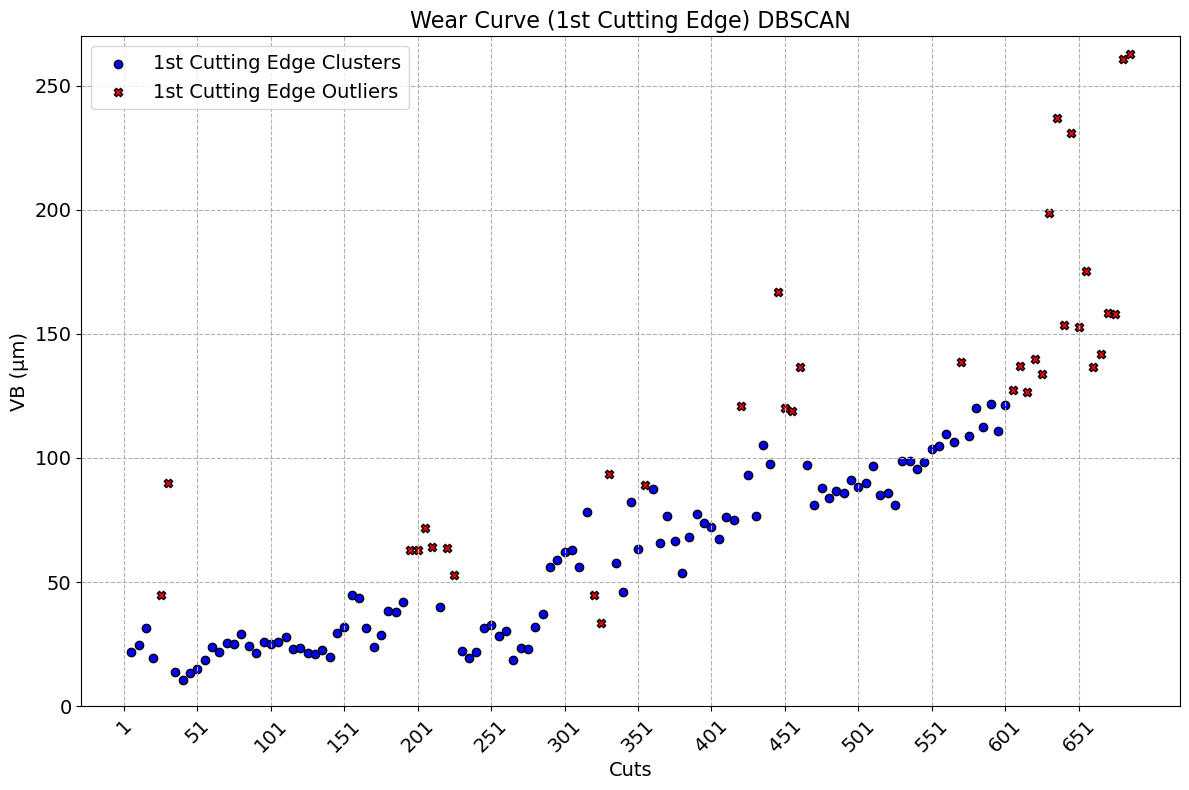

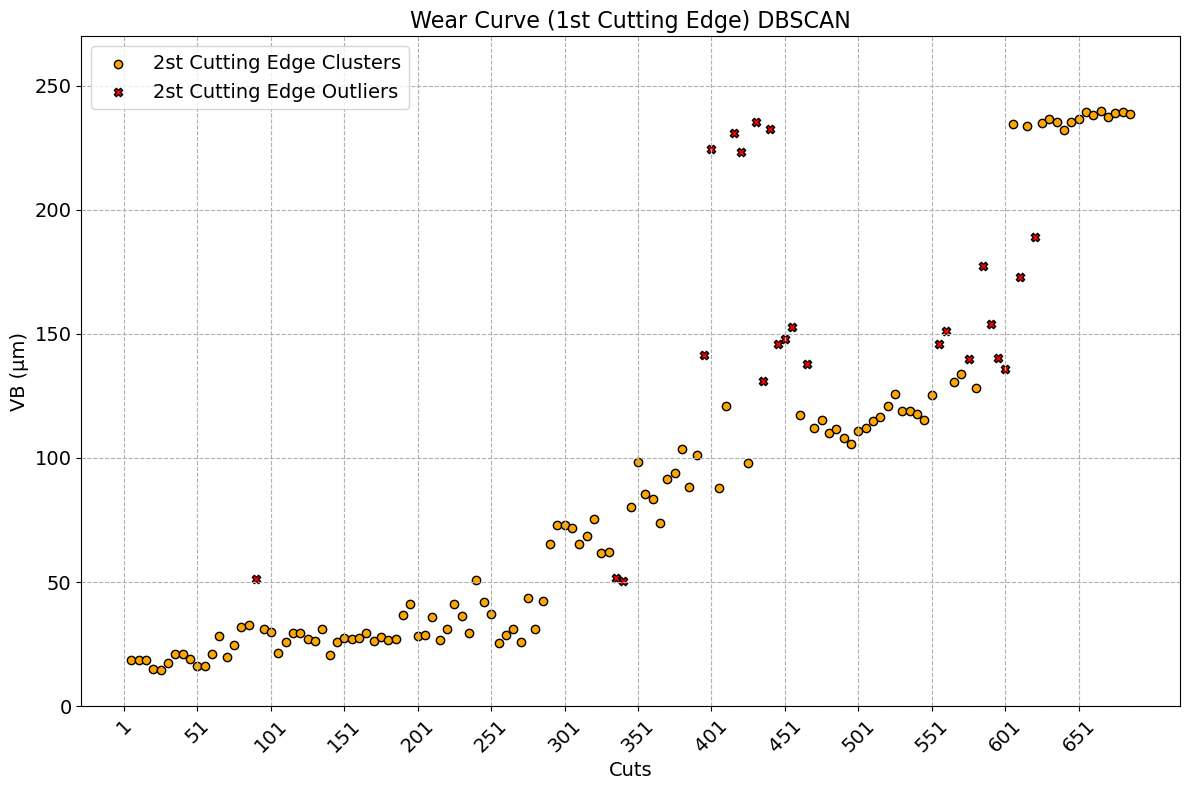

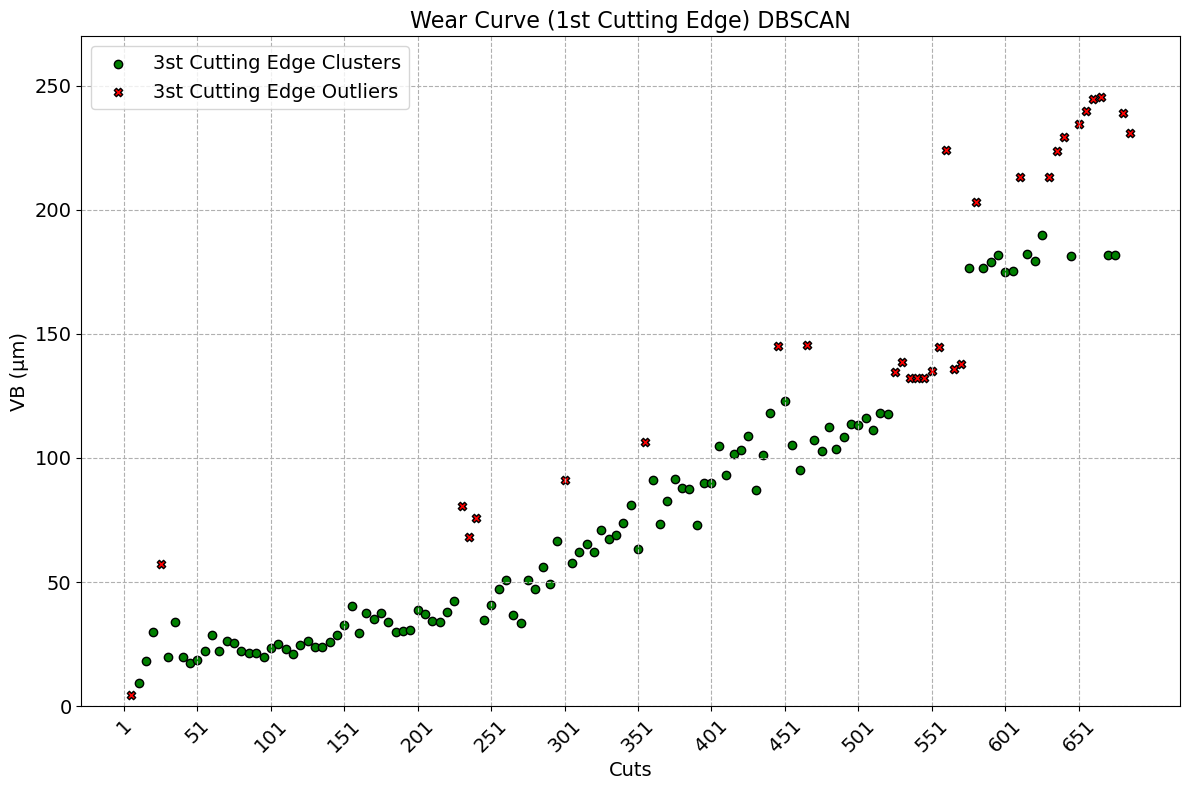

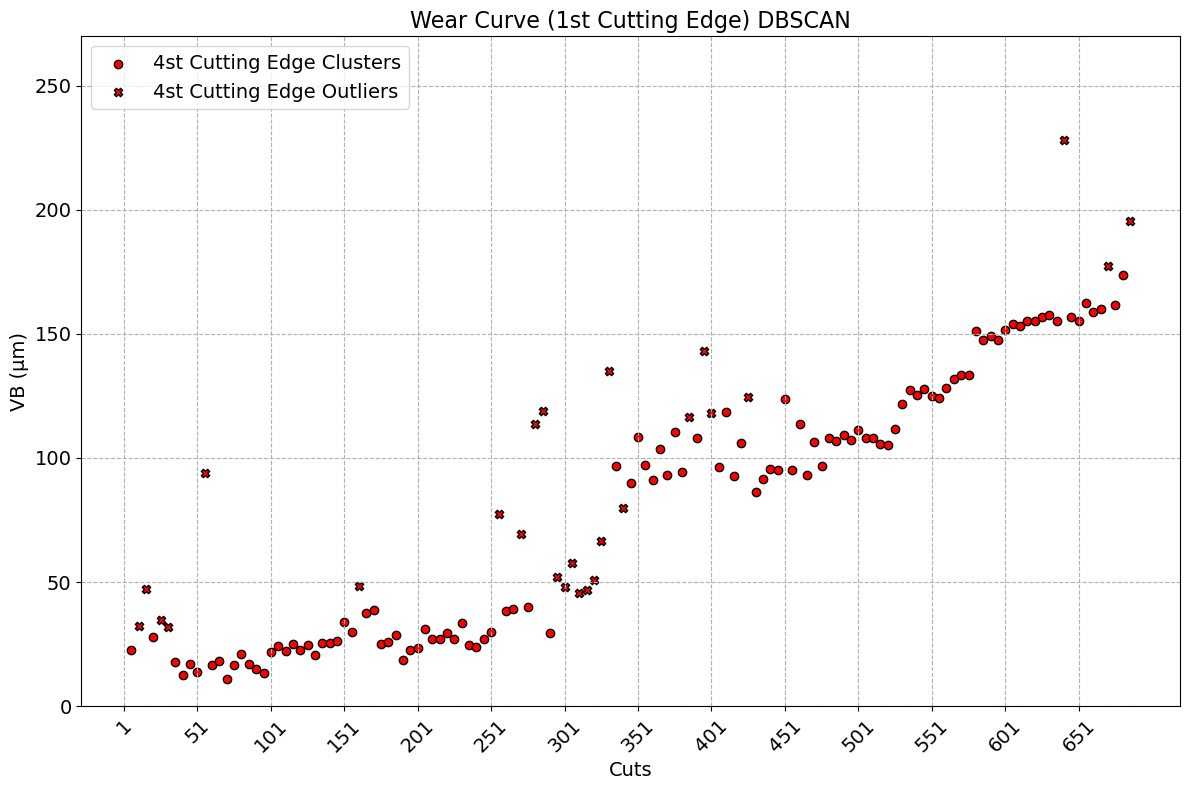

In [20]:
# Define the path to the CSV file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\TEST_Pixel_new_Ortagonal - Copy.xls"

# Load data from the CSV file
#df = pd.read_csv(file_path)
df = pd.read_excel(file_path)

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results_DB_Final')
os.makedirs(results_folder, exist_ok=True)


# Create color map for the teeth
colors = ['blue', 'orange', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Function to apply DBSCAN clustering and plot the results
def apply_dbscan_and_plot(df, tooth_index, color, output_path):
    # Extract the wear values for DBSCAN clustering
    wear_values = df.iloc[tooth_index, 1:].to_numpy()

    # Generate x-values starting from 1 to the length of wear values
    x_values = np.arange(1, len(wear_values) + 1)

    # Create the 2D data array
    data_2d = np.column_stack((x_values, wear_values))

    # Fit the DBSCAN model
    clustering = DBSCAN(eps=12, min_samples=10).fit(data_2d)

    # Extract the labels
    labels = clustering.labels_

    # Create a scatter plot for the clusters
    plt.figure(figsize=(12, 8))

    # Plot clusters in blue
    class_member_mask = (labels != -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, edgecolor='k', label=f'{tooth_index + 1}st Cutting Edge Clusters')

    # Plot outliers in red
    class_member_mask = (labels == -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c='red',  marker='X', edgecolor='k', label=f'{tooth_index + 1}st Cutting Edge Outliers')

    # Generate x-axis labels for all cuts
    x_labels = [f'{i}' for i in range(1, (df.shape[1] - 1) * 5, 5)]

    # Reduce the number of x-axis labels by selecting a subset
    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

    #plt.title(f'VB Curve_DBSCAN Clustering for Tooth {tooth_index + 1}', fontsize=16)
    plt.title(f'Wear Curve (1st Cutting Edge) DBSCAN', fontsize=16)  # Increase the title font size
    plt.xlabel('Cuts', fontsize=14)
    plt.ylabel('VB (μm)', fontsize=14)
    plt.legend(loc='upper left',fontsize=14)
    plt.ylim(y_min, y_max)  # Set common y-axis limit
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.grid(True, linestyle='--')  # Add grid lines
    plt.tight_layout()
    

    # Save the plot as a PNG file
    plt.savefig(os.path.join(output_path, f'VB_Curve_DBSCAN_Tooth_{tooth_index + 1}.png'), format='png', dpi=300)

    plt.show()


# Apply DBSCAN and plot for each tooth
for tooth_index in range(4):
    apply_dbscan_and_plot(df, tooth_index, colors[tooth_index], results_folder)


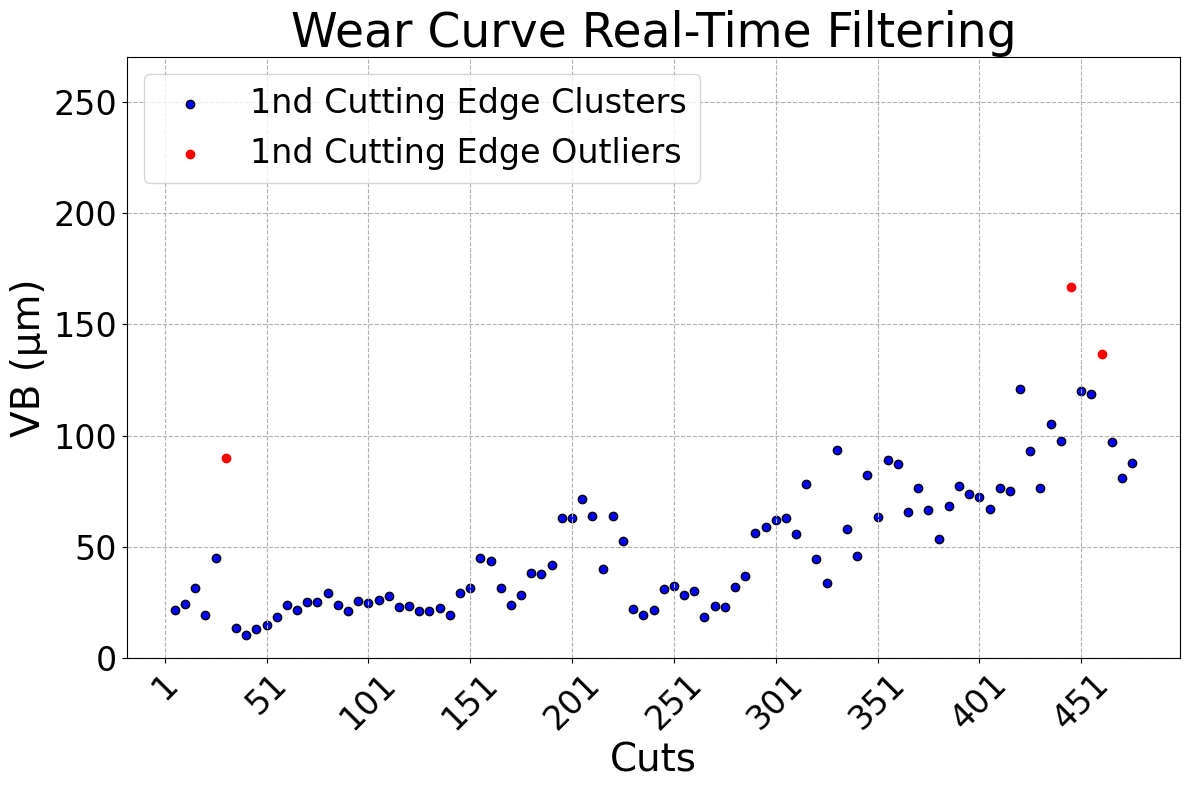

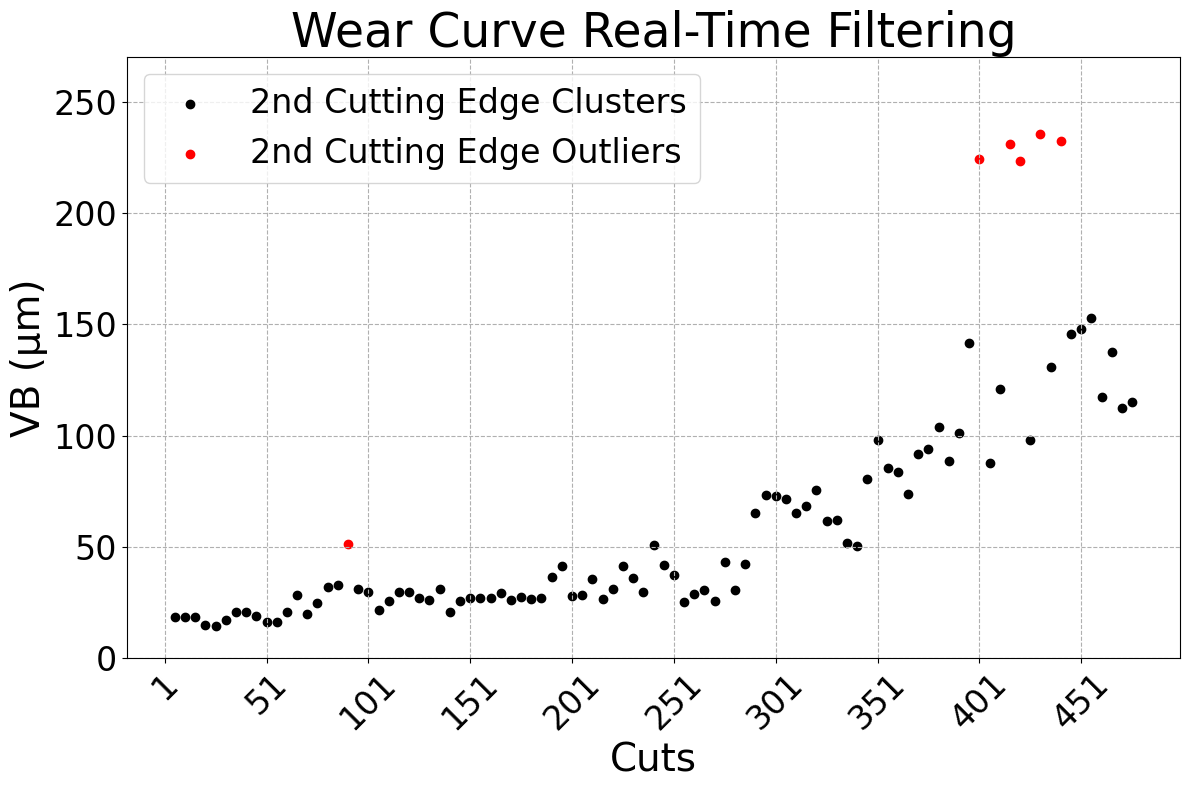

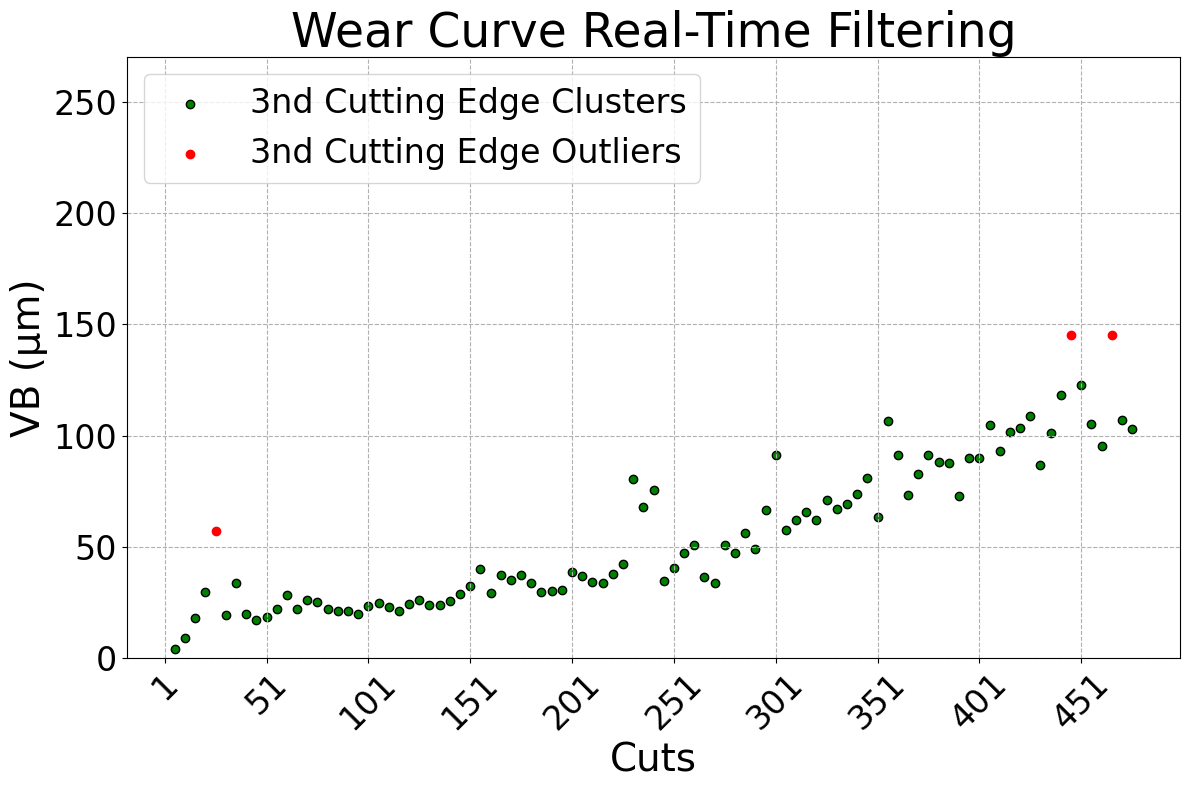

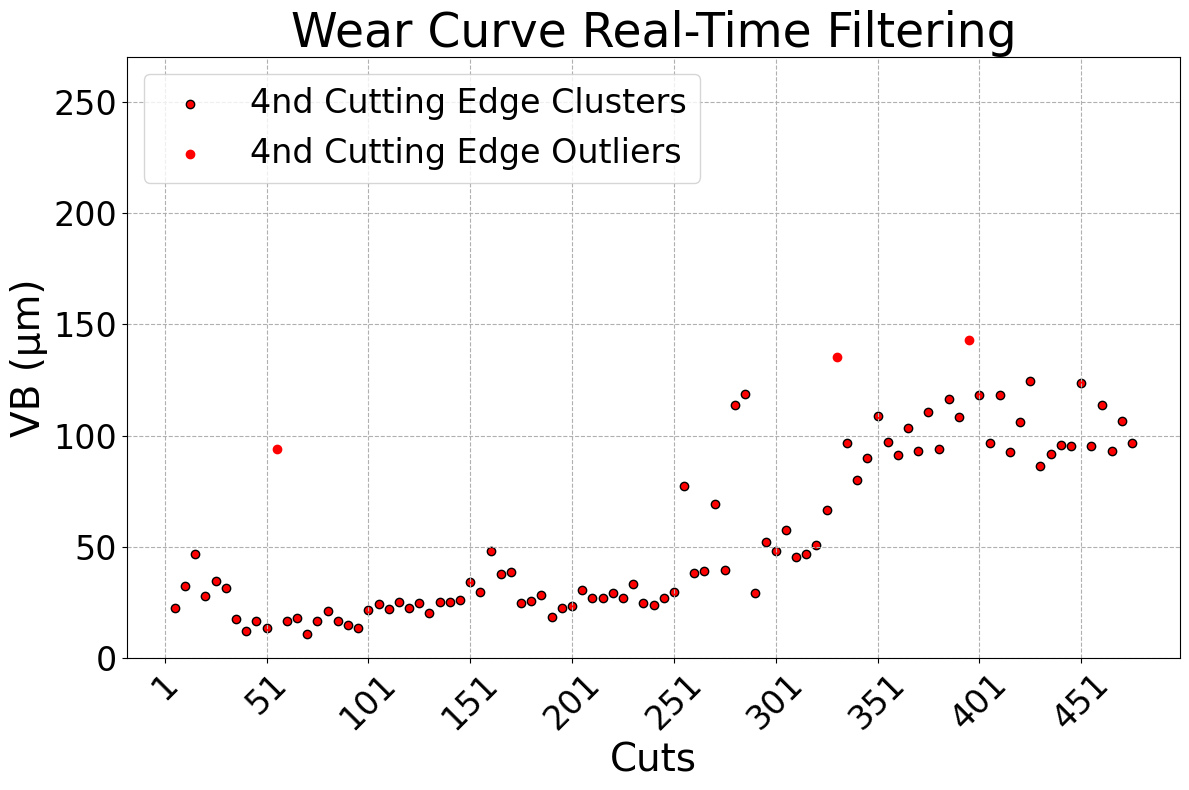

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define the path to the Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\TEST_Pixel_new_Ortagonal - Copy.xls"

# Load data from the Excel file
df = pd.read_excel(file_path)

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results_DB_Final_AX_2')
os.makedirs(results_folder, exist_ok=True)

# Create color map for the teeth
colors = ['blue', 'black', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Function to apply DBSCAN clustering and plot the results
def apply_dbscan_and_plot(df, tooth_index, color, output_path):
    # Extract the wear values for DBSCAN clustering
    wear_values = df.iloc[tooth_index, 1:].to_numpy()

    # Calculate the number of points to include (70% of the data)
    num_points = int(len(wear_values) * 0.70)

    # Generate x-values starting from 1 to the length of wear values
    x_values = np.arange(1, num_points + 1)

    # Create the 2D data array with only the first 70% of data
    data_2d = np.column_stack((x_values, wear_values[:num_points]))

    # Fit the DBSCAN model
    clustering = DBSCAN(eps=18, min_samples=6).fit(data_2d)

    # Extract the labels
    labels = clustering.labels_

    # Create a scatter plot for the clusters
    plt.figure(figsize=(12, 8))

    # Plot clusters in blue
    class_member_mask = (labels != -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, edgecolor='k', label=f'{tooth_index + 1}nd Cutting Edge Clusters')

    # Plot outliers in red
    class_member_mask = (labels == -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c='red', marker='o', edgecolor='r', label=f'{tooth_index + 1}nd Cutting Edge Outliers')

    # Generate x-axis labels for all cuts
    x_labels = [f'{i}' for i in range(1, (num_points - 1) * 5, 5)]

    # Reduce the number of x-axis labels by selecting a subset
    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

    plt.title(f'Wear Curve Real-Time Filtering', fontsize=34)  # Increase the title font size
    plt.xlabel('Cuts', fontsize=28)
    plt.ylabel('VB (μm)', fontsize=28)
    plt.legend(loc='upper left', fontsize=24)
    plt.ylim(y_min, y_max)  # Set common y-axis limit
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.grid(True, linestyle='--')  # Add grid lines
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(os.path.join(output_path, f'VB_Curve_DBSCAN_Tooth_{tooth_index + 1}_70.svg'), format='svg', dpi=300)

    plt.show()

# Apply DBSCAN and plot for each cutting edge
for tooth_index in range(4):
    apply_dbscan_and_plot(df, tooth_index, colors[tooth_index], results_folder)


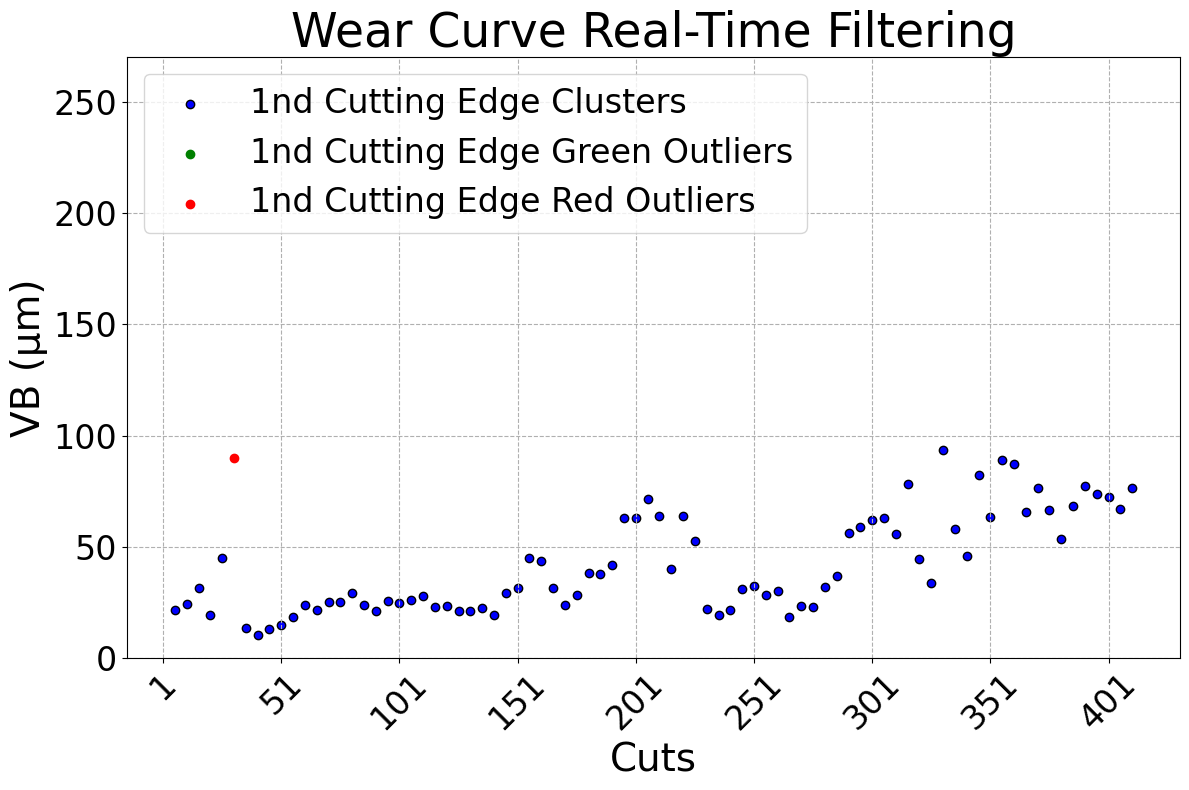

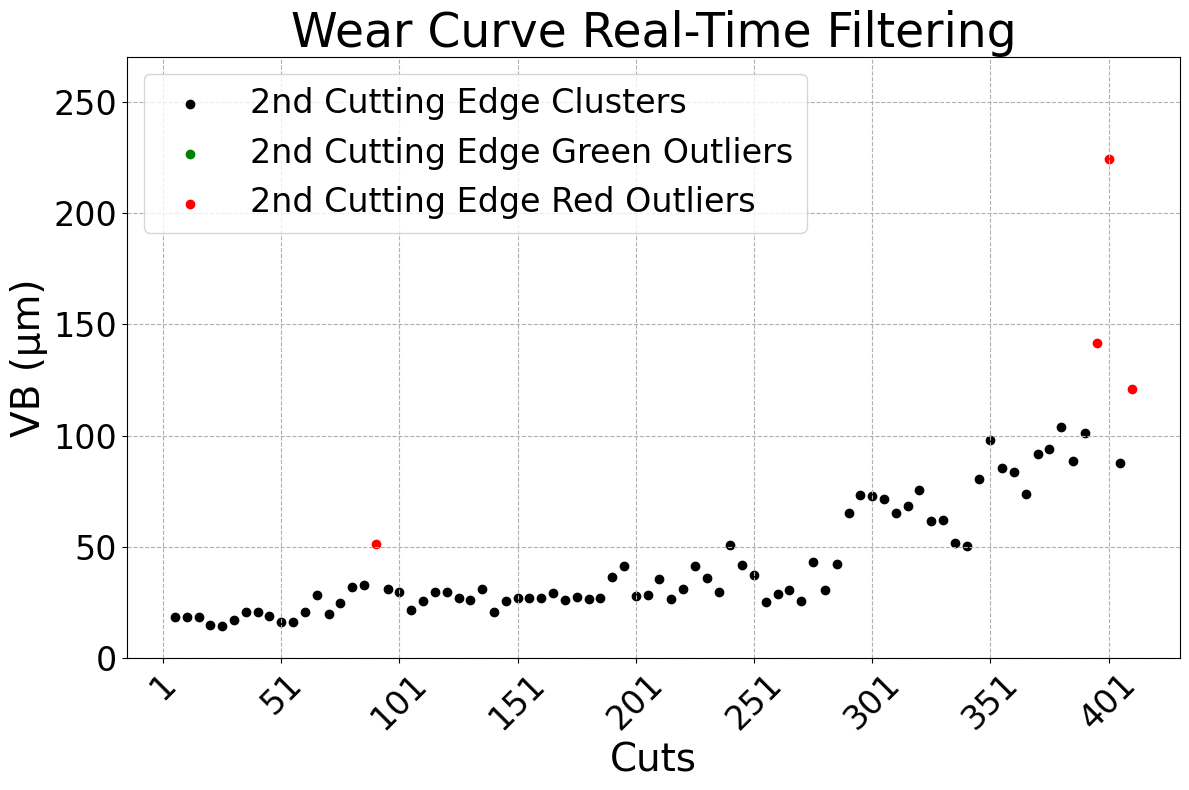

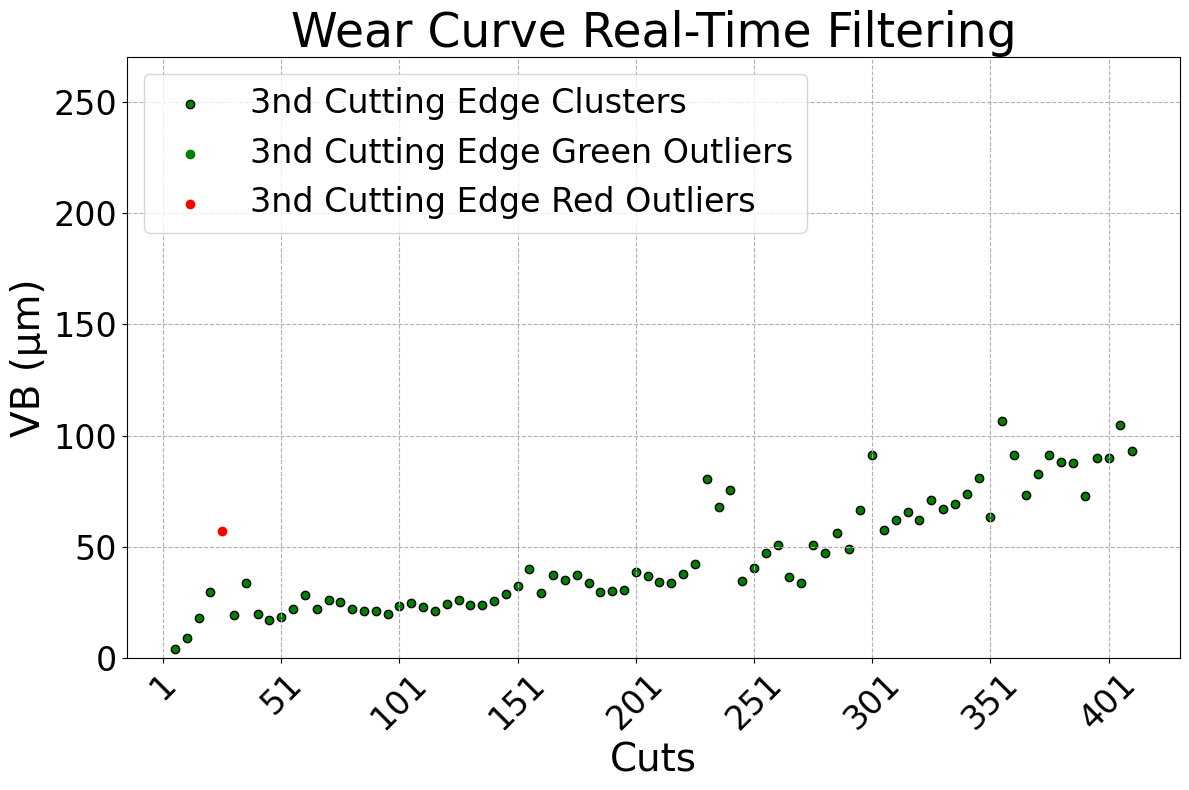

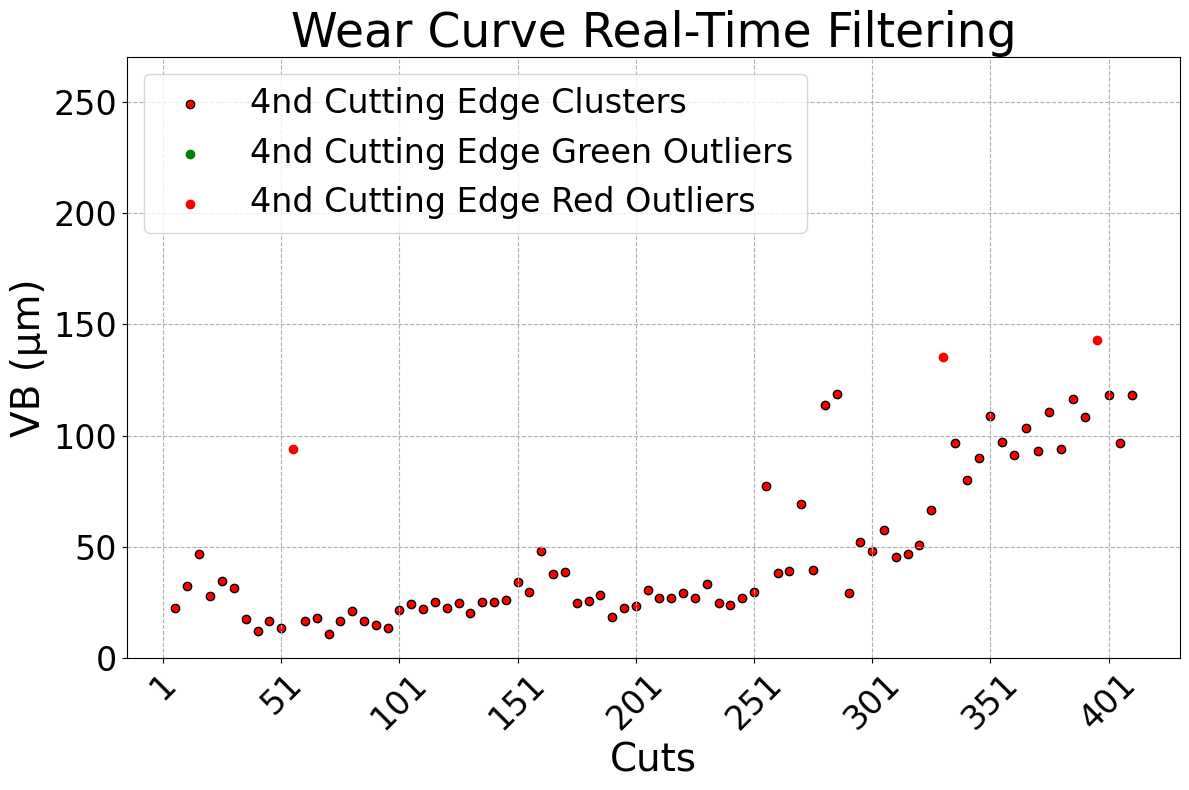

In [8]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Define the path to the Excel file
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test1\Paper\results\TEST_Pixel_new_Ortagonal - Copy.xls"

# Load data from the Excel file
df = pd.read_excel(file_path)

# Create the results folder if it doesn't exist
results_folder = os.path.join(os.path.dirname(file_path), 'results_DB_Final_AX_4')
os.makedirs(results_folder, exist_ok=True)

# Create color map for the teeth
colors = ['blue', 'black', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Function to apply DBSCAN clustering and plot the results
def apply_dbscan_and_plot(df, tooth_index, color, output_path):
    # Extract the wear values for DBSCAN clustering
    wear_values = df.iloc[tooth_index, 1:].to_numpy()

    # Calculate the number of points to include (70% of the data)
    num_points = int(len(wear_values) * 0.60)

    # Generate x-values starting from 1 to the length of wear values
    x_values = np.arange(1, num_points + 1)

    # Create the 2D data array with only the first 70% of data
    data_2d = np.column_stack((x_values, wear_values[:num_points]))

    # Fit the DBSCAN model
    clustering = DBSCAN(eps=18, min_samples=6).fit(data_2d)

    # Extract the labels
    labels = clustering.labels_

    # Create a scatter plot for the clusters
    plt.figure(figsize=(12, 8))

    # Plot clusters in the specified color
    class_member_mask = (labels != -1)
    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=color, edgecolor='k', label=f'{tooth_index + 1}nd Cutting Edge Clusters')

    # Plot outliers in red or green based on the conditions
    class_member_mask = (labels == -1)
    xy = data_2d[class_member_mask]

    # Outliers after cut number 300 and below 200 micrometers VB in green
    green_outliers = xy[(xy[:, 0] > 300) & (xy[:, 1] < 200)]
    plt.scatter(green_outliers[:, 0], green_outliers[:, 1], c='green', marker='o', edgecolor='g', label=f'{tooth_index + 1}nd Cutting Edge Green Outliers')

    # Remaining outliers in red
    red_outliers = xy[~((xy[:, 0] > 300) & (xy[:, 1] < 200))]
    plt.scatter(red_outliers[:, 0], red_outliers[:, 1], c='red', marker='o', edgecolor='r', label=f'{tooth_index + 1}nd Cutting Edge Red Outliers')

    # Generate x-axis labels for all cuts
    x_labels = [f'{i}' for i in range(1, (num_points - 1) * 5, 5)]

    # Reduce the number of x-axis labels by selecting a subset
    plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

    plt.title(f'Wear Curve Real-Time Filtering', fontsize=34)  # Increase the title font size
    plt.xlabel('Cuts', fontsize=28)
    plt.ylabel('VB (μm)', fontsize=28)
    plt.legend(loc='upper left', fontsize=24)
    plt.ylim(y_min, y_max)  # Set common y-axis limit
    plt.tick_params(axis='both', which='major', labelsize=24)
    plt.grid(True, linestyle='--')  # Add grid lines
    plt.tight_layout()

    # Save the plot as a PNG file
    plt.savefig(os.path.join(output_path, f'VB_Curve_DBSCAN_Tooth_{tooth_index + 1}_60.svg'), format='svg', dpi=300)

    plt.show()

# Apply DBSCAN and plot for each cutting edge
for tooth_index in range(4):
    apply_dbscan_and_plot(df, tooth_index, colors[tooth_index], results_folder)


In [7]:
green_outliers

NameError: name 'green_outliers' is not defined

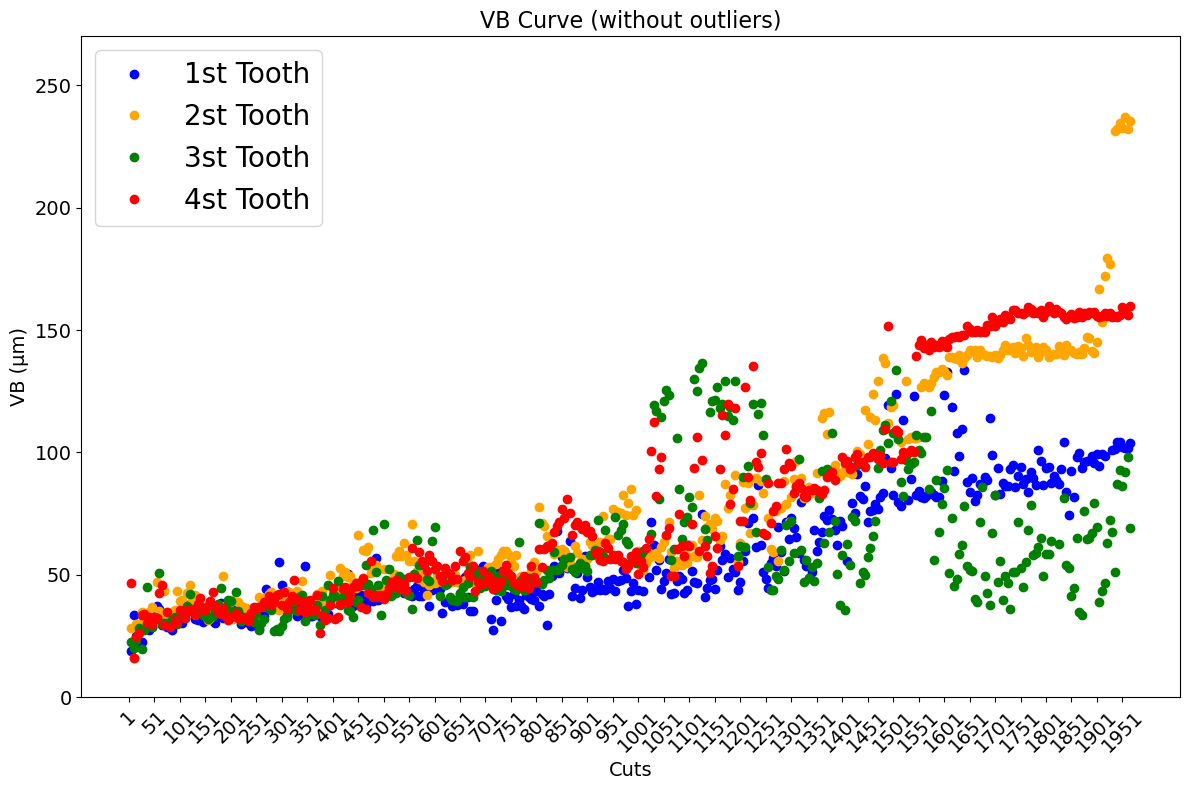

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
import os

# Define file paths
file_path = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test3_2024.05.28_2024.06.17\Paper\02_Segmented\results\TEST_Pixel_new_Ortagonal.csv"
results_folder = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images\Test3_2024.05.28_2024.06.17\Paper\02_Segmented\results\results\DB"
os.makedirs(results_folder, exist_ok=True)

# Load data from CSV file
df = pd.read_csv(file_path)
#df = pd.read_excel(file_path)

# Create color map for the teeth
colors = ['blue', 'orange', 'green', 'red']

# Determine the common y-axis limit
y_min = 0
y_max = 270

# Generate x-axis labels for all cuts
x_labels = [f'{i}' for i in range(1, (df.shape[1]-1)*5, 5)]

# Initialize the plot
plt.figure(figsize=(12, 8))

# Function to apply DBSCAN clustering and get filtered data
def get_filtered_data(df, tooth_index):
    # Extract the wear values for DBSCAN clustering
    wear_values = df.iloc[tooth_index, 1:].to_numpy()

    # Generate x-values starting from 1 to the length of wear values
    x_values = np.arange(1, len(wear_values) + 1)

    # Create the 2D data array
    data_2d = np.column_stack((x_values, wear_values))

    # Fit the DBSCAN model
    clustering = DBSCAN(eps=15, min_samples=5).fit(data_2d)

    # Extract the labels
    labels = clustering.labels_

    # Filter out outliers
    mask = (labels != -1)
    filtered_data = data_2d[mask]
    return filtered_data

# Plot data for each tooth
for tooth_index in range(4):
    filtered_data = get_filtered_data(df, tooth_index)
    plt.plot(filtered_data[:, 0], filtered_data[:, 1], marker='o', linestyle='None', color=colors[tooth_index], label=f'{tooth_index + 1}st Tooth')

# Reduce the number of x-axis labels by selecting a subset
plt.xticks(ticks=range(0, len(x_labels), 10), labels=[x_labels[i] for i in range(0, len(x_labels), 10)], rotation=45)

plt.xlabel('Cuts', fontsize=14)
plt.ylabel('VB (μm)', fontsize=14)
plt.title('VB Curve (without outliers)', fontsize=16)
plt.legend(loc='upper left', fontsize=20)
plt.ylim(y_min, y_max)  # Set common y-axis limit
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'Combined_VB_Curve.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Show the plot
plt.show()


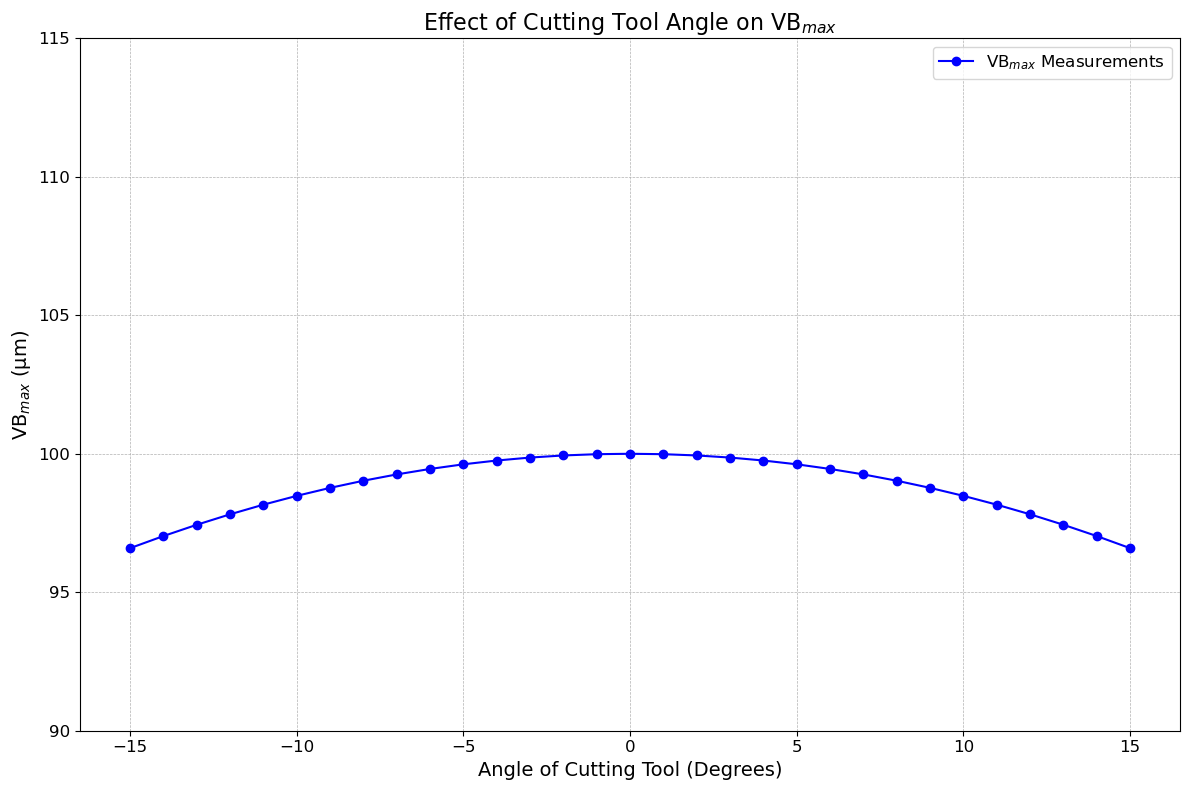

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory to save the results
results_folder = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images"
os.makedirs(results_folder, exist_ok=True)

# Generate x-values which represent the angle of the cutting tool
x_values = np.arange(-15, 16)

# Calculate the y-values using the given formula
y_values = 100 * np.cos(np.radians(x_values))

# Determine the common y-axis limit
y_min = 90
y_max = 115

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='VB$_{max}$ Measurements')

# Adding more academic elements
plt.xlabel('Angle of Cutting Tool (Degrees)', fontsize=14)
plt.ylabel('VB$_{max}$ (μm)', fontsize=14)
plt.title('Effect of Cutting Tool Angle on VB$_{max}$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.ylim(y_min, y_max)  # Set common y-axis limit
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VBmax_measurements.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Displaying the plot
plt.show()


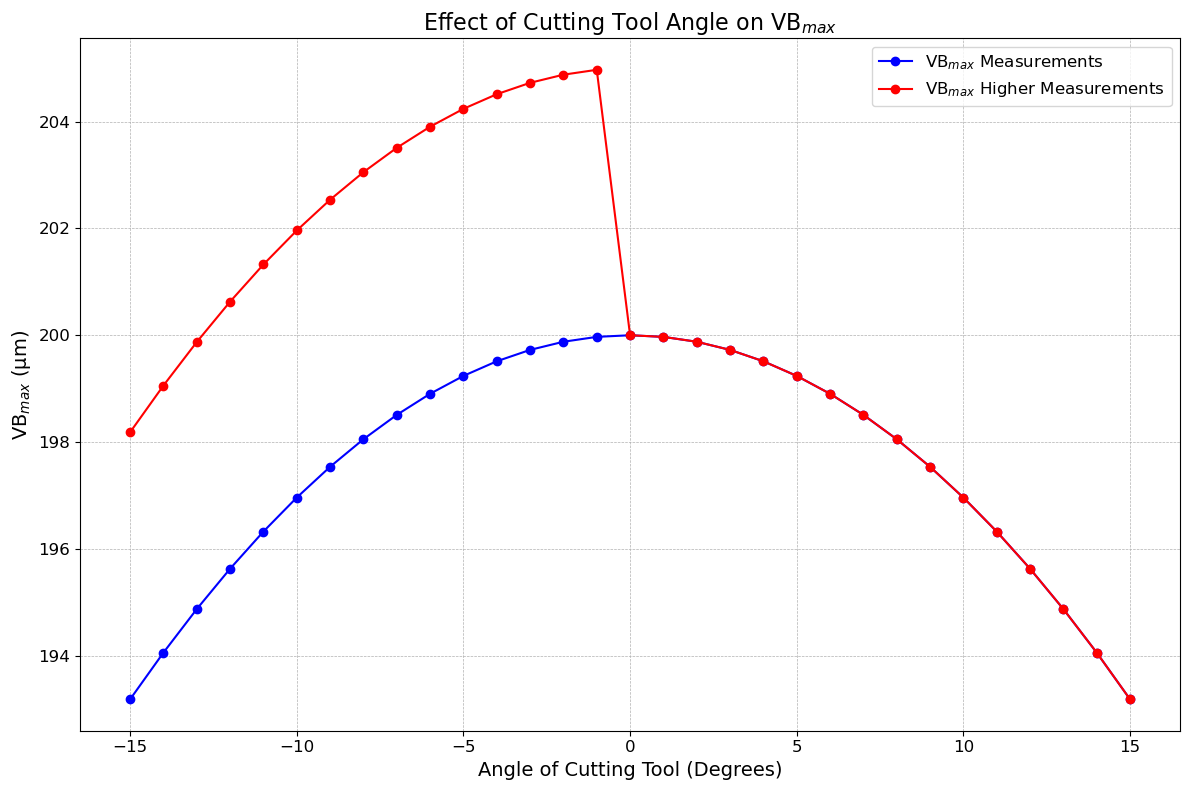

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory to save the results
results_folder = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images"
os.makedirs(results_folder, exist_ok=True)

# Generate x-values which represent the angle of the cutting tool
x_values = np.arange(-15, 16)

# Calculate the y-values using the given formula
y_values = 200 * np.cos(np.radians(x_values))

# Calculate the second set of y-values, ensuring values from -15 to 0 degrees are higher by a factor of 5
y_values_higher = y_values.copy()
y_values_higher[x_values < 0] += 5

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='b', label='VB$_{max}$ Measurements')
plt.plot(x_values, y_values_higher, marker='o', linestyle='-', color='r', label='VB$_{max}$ Higher Measurements')

# Adding more academic elements
plt.xlabel('Angle of Cutting Tool (Degrees)', fontsize=14)
plt.ylabel('VB$_{max}$ (μm)', fontsize=14)
plt.title('Effect of Cutting Tool Angle on VB$_{max}$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VBmax_measurements_with_higher.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Displaying the plot
plt.show()


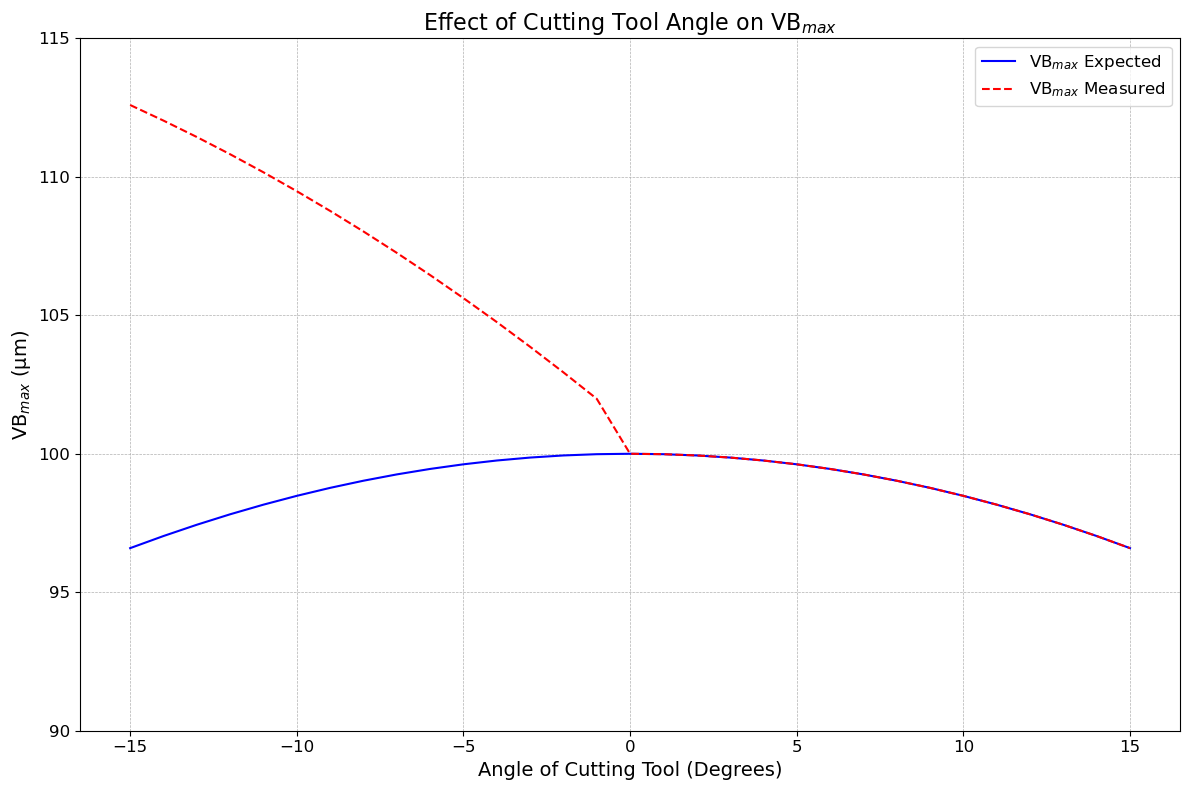

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Directory to save the results
results_folder = r"D:\02-Project\01-Wear Detection\01_Camera\07-Images"
os.makedirs(results_folder, exist_ok=True)

# Generate x-values which represent the angle of the cutting tool
x_values = np.arange(-15, 16)

# Calculate the y-values using the given formula
y_values = 100 * np.cos(np.radians(x_values))

# Determine the common y-axis limit
y_min = 90
y_max = 115

# Calculate the second set of y-values, ensuring values from -15 to 0 degrees are higher by a decrementing factor
y_values_higher = y_values.copy()
for i, x in enumerate(x_values):
    if x < 0:
        y_values_higher[i] += (1 - x)

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(x_values, y_values, linestyle='-', color='b', label='VB$_{max}$ Expected')
plt.plot(x_values, y_values_higher, linestyle='--', color='r', label='VB$_{max}$ Measured')

# Adding more academic elements
plt.xlabel('Angle of Cutting Tool (Degrees)', fontsize=14)
plt.ylabel('VB$_{max}$ (μm)', fontsize=14)
plt.title('Effect of Cutting Tool Angle on VB$_{max}$', fontsize=16)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(fontsize=12)
plt.ylim(y_min, y_max)  # Set common y-axis limit
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Full path to save the file
output_path = os.path.join(results_folder, 'VBmax_measurements_with_higher.png')

# Save the plot as a PNG file
plt.savefig(output_path, format='png', dpi=300)

# Displaying the plot
plt.show()
